<br>
<br>
<b><font size=5pt>주요학회 논문자료 메타분석</font></b>

ICML, NIPS학회 12년간 (2005~2016년) 발표된 논문 6,163개 분석



<b>[ 분석방법론 ]</b>

1) 자료 수집
ICML Conferences http://www.machinelearning.org/icml.html
NIPS Proceeding  https://papers.nips.cc/ 
에서 자료를 받았다. 2005년 부터 2016년까지 총 12년치 accepted papers 자료를 활용하였다. 

2) 표본 데이터 
ICML에서 12년간 총 2,315개의 논문, NIPS에서 12년간 총 3,848개의 논문 데이터를 활용하였다.

3) 논문 인용횟수 조회
https://scholar.google.co.kr/ 사이트를 통해서 각 논문 제목별 인용횟수(citations)를 조회했다. 시간이 지남에 따라 새로운 논문들이 발표되면서 기존 논문들의 인용회수가 조금씩 증가하고 있다. 분석을 위해 특정 시점인 2017년 4월 21일 조회한 인용횟수를 기준으로 하였음을 알려 둔다. 

4) 분석 자료 및 방법론
https://github.com/giallo41/Data_Science/tree/master/Documents/Python/
수집한 데이터 파일과 분석을 위해 사용한 Python 소스를 올려 두고 있다. 
- ICML 과 NIPS의 12년간 논문제목, 저자, 논문별 인용횟수 파일을 엑셀에 저장하고 이를 Python의 Pandas dataframe을 통해 분석 작업을 진행 하였다.
- 각 학회의 연도별 가장 높은 인용횟수를 기준으로 dataframe.sort() 함수를 사용하여 가장 높은 순위의 10개 논문을 선택하였다. 
- 저자 이름별로 12년간 누적인용횟수를 모두 합산하여 그중 가장 높은 횟수를 기록한 저자들을 역시 dataframe.sort() 함수를 사용하여 선택하였다. 
- 논문제목 분석을 위해 제목을 단어별로 분리 하고 모두 소문자로 변환하였다. 이들 중 ( ':','?','for', 'a','an' ,'in', 'of', 'with', 'and', 'the', 'to', 'on', 'from', 'by', 'using', 'very', 'via', 'it', 'that', 'as', ',' ,'which', '-', 'through', 'without', 'while', 'is','than', 'where', 'much','many', 'or', 'so' ) 단어들은 분석에서 제외 하였다. 
- 연도별 논문 제목에 가장 많이 등장하는 keyword를 도식화한 wordcloud 분석은 python에서 제공하는 wordcloud 패키지를 사용하였다. 

In [1]:
## 필요한 라이브러리들을 Import한다. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
from wordcloud import WordCloud
from collections import Counter
import random
%matplotlib inline




In [2]:
## 분석을 위해 사용한 hyper-parameter를 설정한다. 

# png 이미지 출력을 위한 dpi 초기값
my_dpi = 300 

# 학회 데이터를 포함한 연도 2005년~2016년
list_year = range(2005, 2017)
list_name = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']



In [3]:
## 엑셀 파일을 pandas dataframe으로 불러 들인다.
## 총 6,163개의 Data로 구성되어있다. 
df = pd.read_excel("CONF_RAW.xlsx",na_values="...")

print (len(df))
df.head()

6163


Conf  Year                                              Title  Num  \
0  NIPS  2016  Scan Order in Gibbs Sampling Models in Which i...    4   
1  NIPS  2016          Deep ADMM-Net for Compressive Sensing MRI    4   
2  NIPS  2016         A scaled Bregman theorem with applications    3   
3  NIPS  2016  Swapout Learning an ensemble of deep architect...    3   
4  NIPS  2016      On Regularizing Rademacher Observation Losses    1   

        Author_1              Author_2            Author_3        Author_4  \
0    Bryan D. He  Christopher M. De Sa  Ioannis Mitliagkas  Christopher Re   
1       yan yang              Jian Sun           Huibin Li      Zongben Xu   
2   Richard Nock          Aditya Menon      Cheng Soon Ong             NaN   
3  Saurabh Singh           Derek Hoiem       David Forsyth             NaN   
4   Richard Nock                   NaN                 NaN             NaN   

  Author_5 Author_6 Author_7 Author_8 Author_9 Author_10 Author_11 Author_12  \
0      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
1      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   

   Author_13  Cite_Num  
0        NaN         1  
1        NaN         2  
2        NaN         0  
3        NaN        21  
4        NaN         1

In [4]:
## 두 학회의 12년간 발표된 논문 수 
df_num_papers = df.groupby(['Conf', 'Year'])[['Title']].count()
print (df_num_papers)

           Title
Conf Year       
ICML 2005    134
     2006    140
     2007    148
     2008    158
     2009    160
     2010    159
     2011    152
     2012    246
     2013    116
     2014    310
     2015    270
     2016    322
NIPS 2005    207
     2006    204
     2007    217
     2008    250
     2009    262
     2010    292
     2011    306
     2012    368
     2013    360
     2014    411
     2015    403
     2016    568


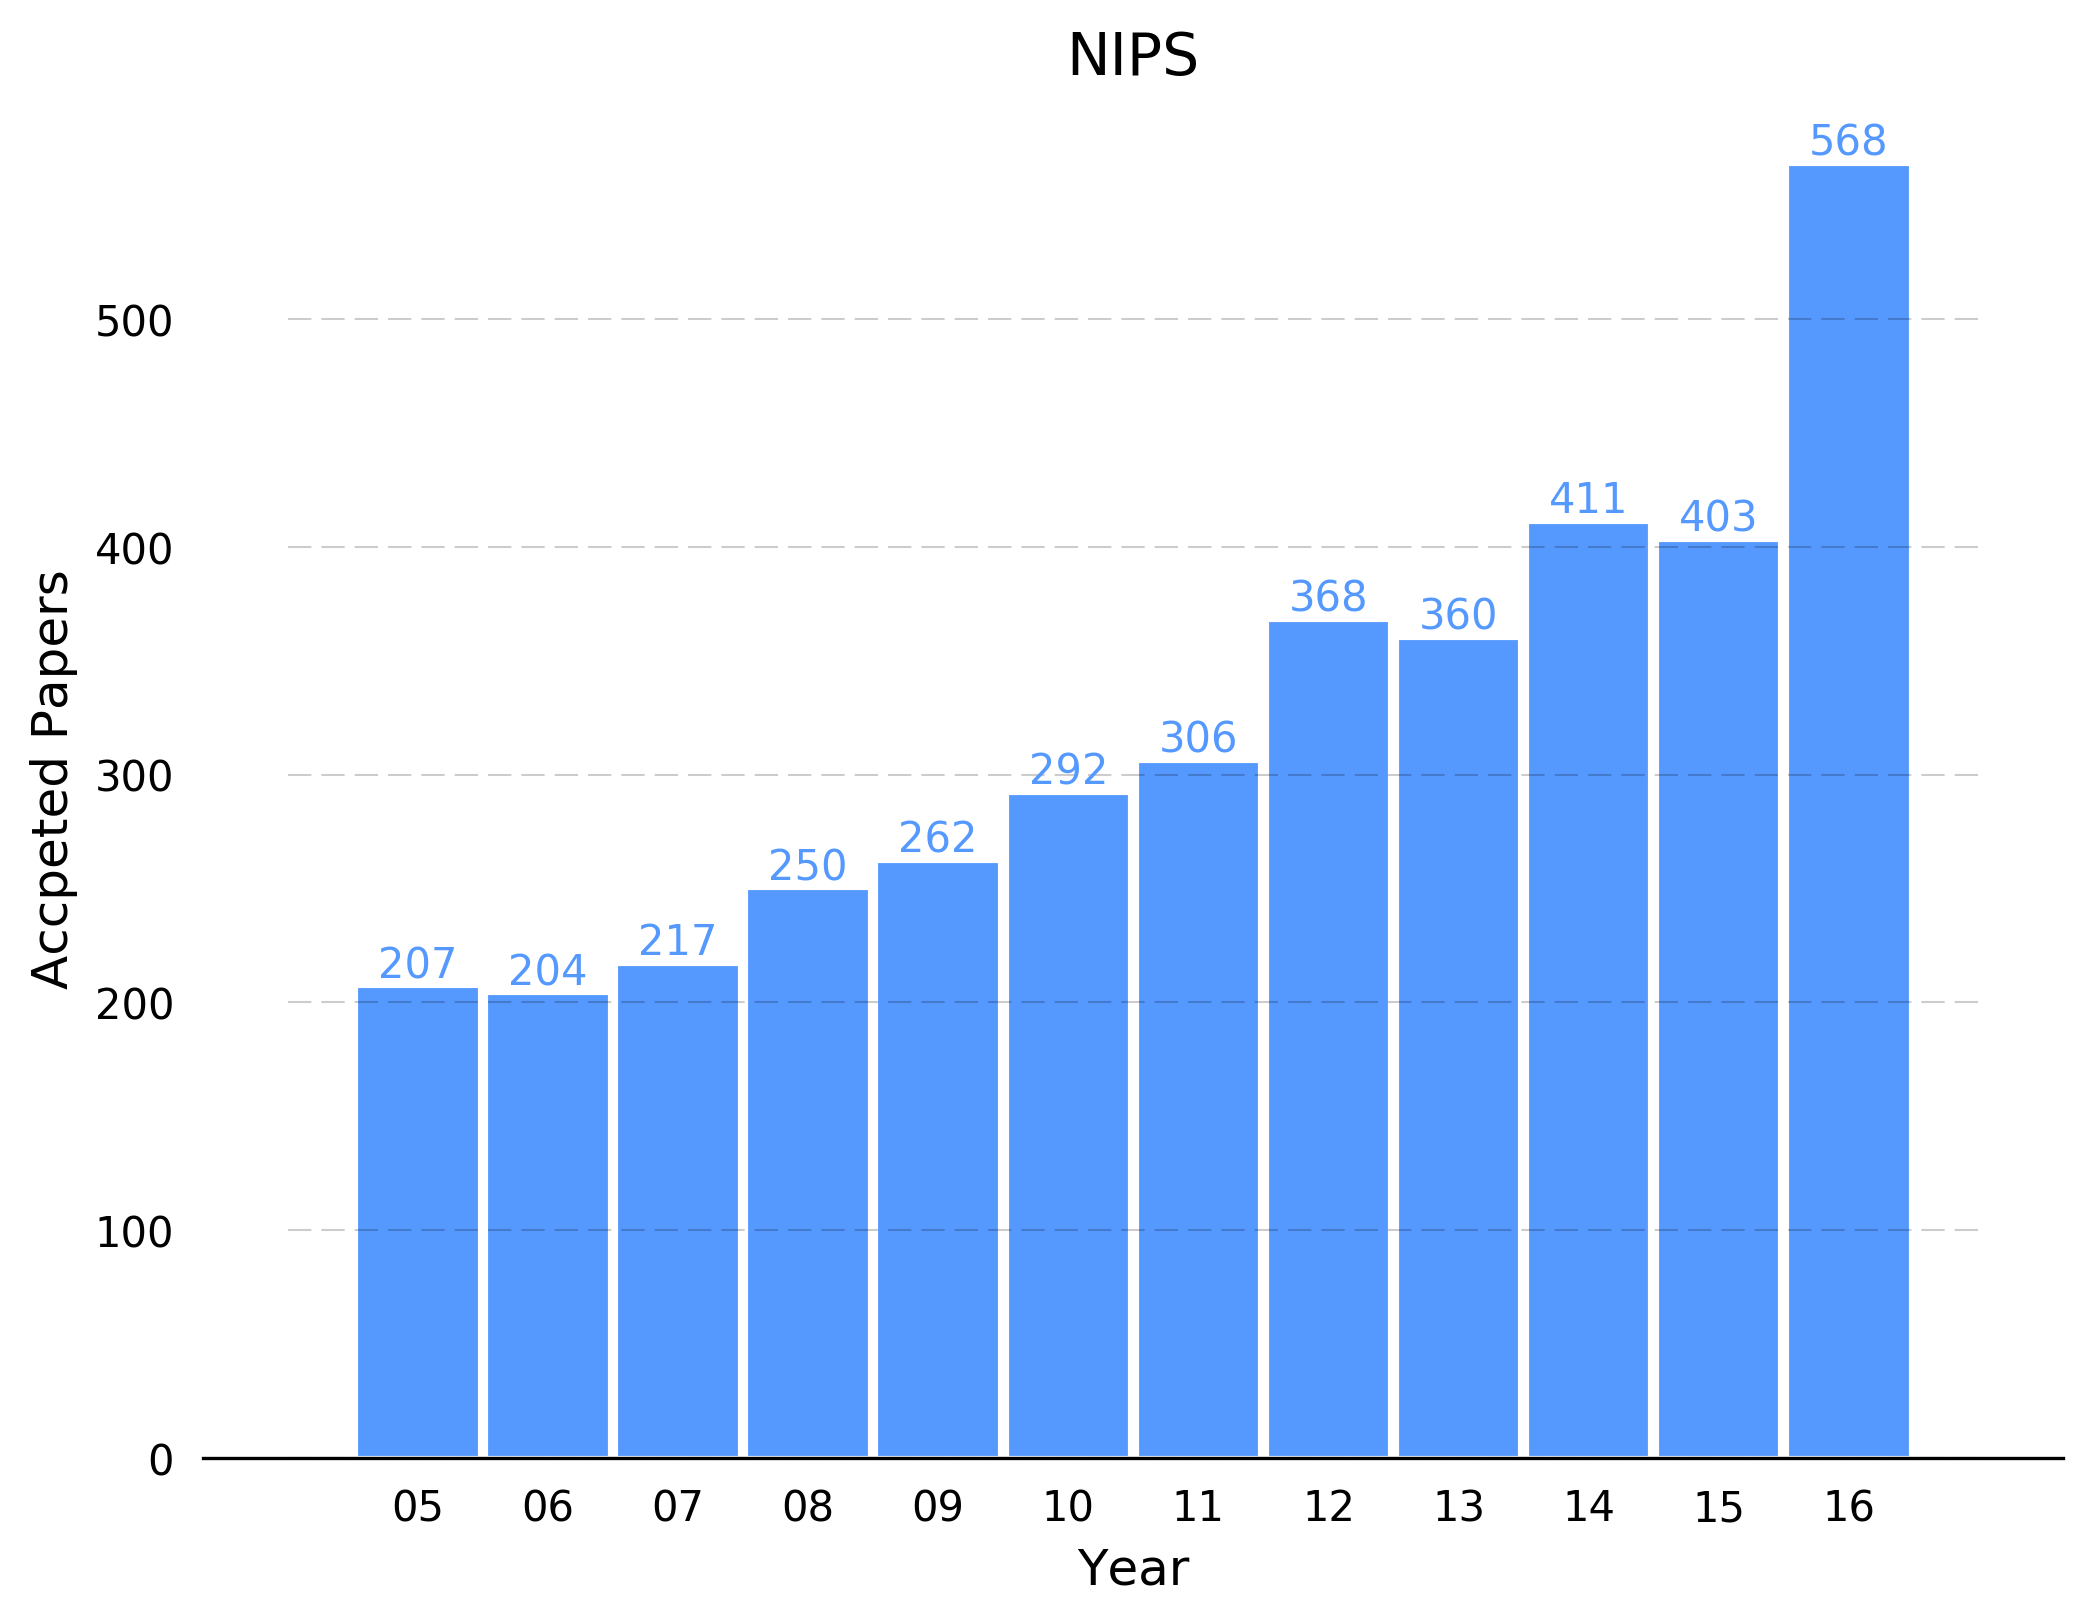

In [7]:
conf = 'NIPS'
num_papers=df_num_papers.loc[conf].Title.tolist()

def graph_num_title(num_papers, conf):
    fig = plt.figure(figsize=(8, 6), dpi=my_dpi)
    ax = plt.subplot(111)  
    
    for y in range(0, 590,100):    
        plt.plot(range(2004, 2018), [y] * len(range(2004, 2018)), "--", lw=0.5, color="black", alpha=0.2)    

    plt.bar(list_year, num_papers,width=0.95, color='#5599ff', edgecolor='white')

    plt.xlabel('Year', fontsize=12)
    plt.ylabel("Accpeted Papers", fontsize=12)
    text_legend_line = conf
    plt.title(text_legend_line, size=14)

    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  

    plt.xticks(list_year, list_name, fontsize=10,color='black', horizontalalignment='center')

    for x, y in zip(list_year, num_papers):
        plt.text(x, y + 0.05, format(y, ','), ha='center', va= 'bottom', size=10, color='#5599ff')

    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    

    plt.show()

    
graph_num_title(num_papers, conf)

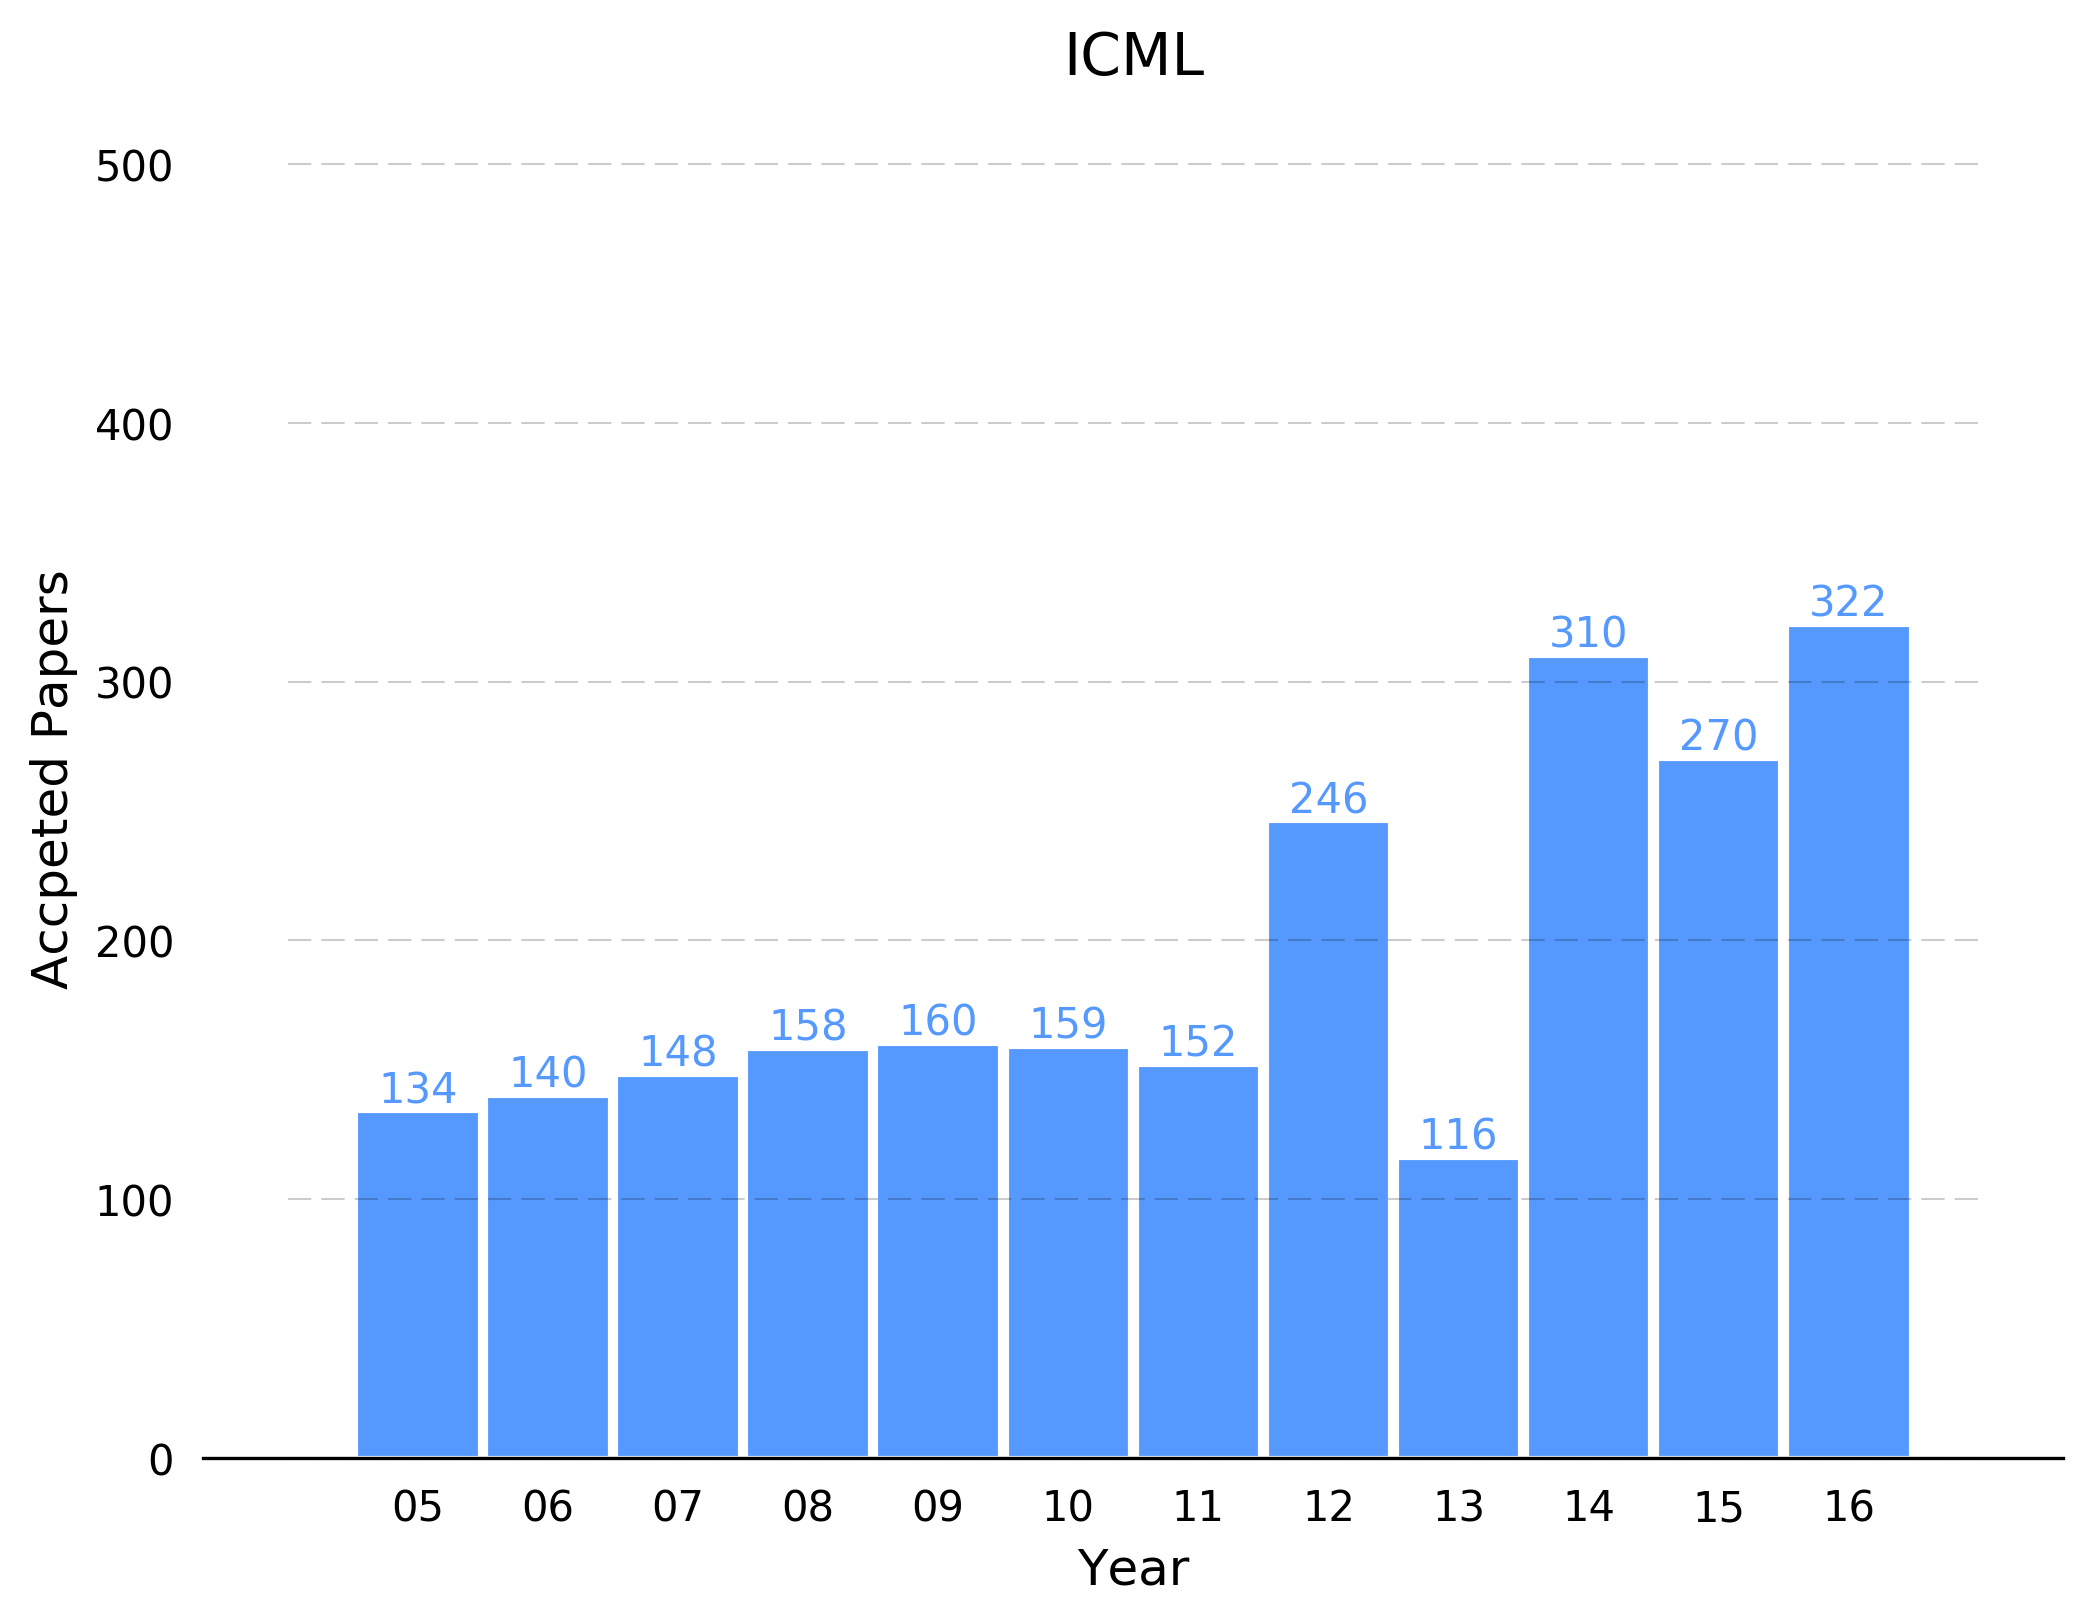

In [8]:
conf = 'ICML'
num_papers=df_num_papers.loc[conf].Title.tolist()

graph_num_title(num_papers, conf)

In [9]:
## 가장 인용이 많이된 논문들 ICML Top 10

conf = 'ICML'
df_index = df[df['Conf']==conf]

top_num = 10

for i in range(len(list_year)):
    if i == 0 :
        df_top_2005 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 1 :
        df_top_2006 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 2 :
        df_top_2007 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 3 :
        df_top_2008 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 4 :
        df_top_2009 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 5 :
        df_top_2010 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 6 :
        df_top_2011 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 7 :
        df_top_2012 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 8 :
        df_top_2013 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 9 :
        df_top_2014 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 10 :
        df_top_2015 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 11 :
        df_top_2016 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]

df_top_s = [df_top_2005,df_top_2006,df_top_2007,df_top_2008,df_top_2009,df_top_2010
           ,df_top_2011, df_top_2012, df_top_2013, df_top_2014, df_top_2015, df_top_2016]

for i in range(len(list_year)):
    print (df_top_s[i])


      Conf  Year                                              Title  Cite_Num  \
5900  ICML  2005            Learning to Rank using Gradient Descent      1507   
5978  ICML  2005  Fast Maximum Margin Matrix Factorization for C...       707   
5936  ICML  2005  A Support Vector Method for Multivariate Perfo...       706   
5961  ICML  2005          Comparing Clusterings - An Axiomatic View       522   
5946  ICML  2005  Semi-supervised Graph Clustering A Kernel Appr...       442   
6001  ICML  2005  Learning Structured Prediction Models A Large ...       441   
5992  ICML  2005  Beyond the Point Cloud from Transductive to Se...       411   
6019  ICML  2005  Learning from Labeled and Unlabeled Data on a ...       346   
5922  ICML  2005  Near-Optimal Sensor Placements in Gaussian Pro...       341   
5988  ICML  2005  Non-Negative Tensor Factorization with Applica...       337   

                Author_1            Author_2             Author_3  \
5900      Greg Hullender        Chris B

/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3

In [10]:
## 가장 인용이 많이된 논문들 NIPS Top 10

conf = 'NIPS'
df_index = df[df['Conf']==conf]

top_num = 10

for i in range(len(list_year)):
    if i == 0 :
        df_top_2005 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 1 :
        df_top_2006 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 2 :
        df_top_2007 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 3 :
        df_top_2008 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 4 :
        df_top_2009 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 5 :
        df_top_2010 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 6 :
        df_top_2011 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 7 :
        df_top_2012 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 8 :
        df_top_2013 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 9 :
        df_top_2014 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 10 :
        df_top_2015 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]
    if i == 11 :
        df_top_2016 = \
            df_index[(df_index['Year']==list_year[i])].sort('Cite_Num', ascending=False).head(top_num)\
            [['Conf','Year','Title','Cite_Num',
              'Author_1','Author_2','Author_3','Author_4','Author_5','Author_6',
              'Author_7','Author_8','Author_9','Author_10','Author_11','Author_12','Author_13']]

df_top_s = [df_top_2005,df_top_2006,df_top_2007,df_top_2008,df_top_2009,df_top_2010
           ,df_top_2011, df_top_2012, df_top_2013, df_top_2014, df_top_2015, df_top_2016]

for i in range(len(list_year)):
    print (df_top_s[i])


      Conf  Year                                              Title  Cite_Num  \
3825  NIPS  2005  Distance Metric Learning for Large Margin Near...      1419   
3660  NIPS  2005         Saliency Based on Information Maximization       942   
3704  NIPS  2005              Laplacian Score for Feature Selection       811   
3659  NIPS  2005                            Correlated Topic Models       725   
3798  NIPS  2005      Sparse Gaussian Processes using Pseudo-inputs       663   
3700  NIPS  2005  Infinite latent feature models and the Indian ...       628   
3697  NIPS  2005              Metric Learning by Collapsing Classes       590   
3818  NIPS  2005    Multiple Instance Boosting for Object Detection       578   
3739  NIPS  2005                Location-based activity recognition       518   
3709  NIPS  2005         Bayesian Surprise Attracts Human Attention       508   

                  Author_1             Author_2          Author_3 Author_4  \
3825  Kilian Q. Weinberger    

/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3

In [12]:
## 두 학회의 저자별 인용 횟수 비교 
## pandas dataframe으로 엑셀 파일로드
df_cite_all = pd.read_csv("ALL_most_cited_author.csv", na_values="...")
df_cite_nips = pd.read_csv("NIPS_most_cited_author.csv", na_values="...")
df_cite_icml = pd.read_csv("ICML_most_cited_author.csv", na_values="...")


# 상위 20개를 보여주기 위한 Hyper-parameter
top_num = 20

df_cite_all.head()

Unnamed: 0              author  cite_num  paper_num
0           0      Ilya Sutskever     17688         17
1           1  Geoffrey E. Hinton     17673         30
2           2        Andrew Y. Ng     16409         46
3           3     Alex Krizhevsky     11057          1
4           4       Yoshua Bengio     10287         50

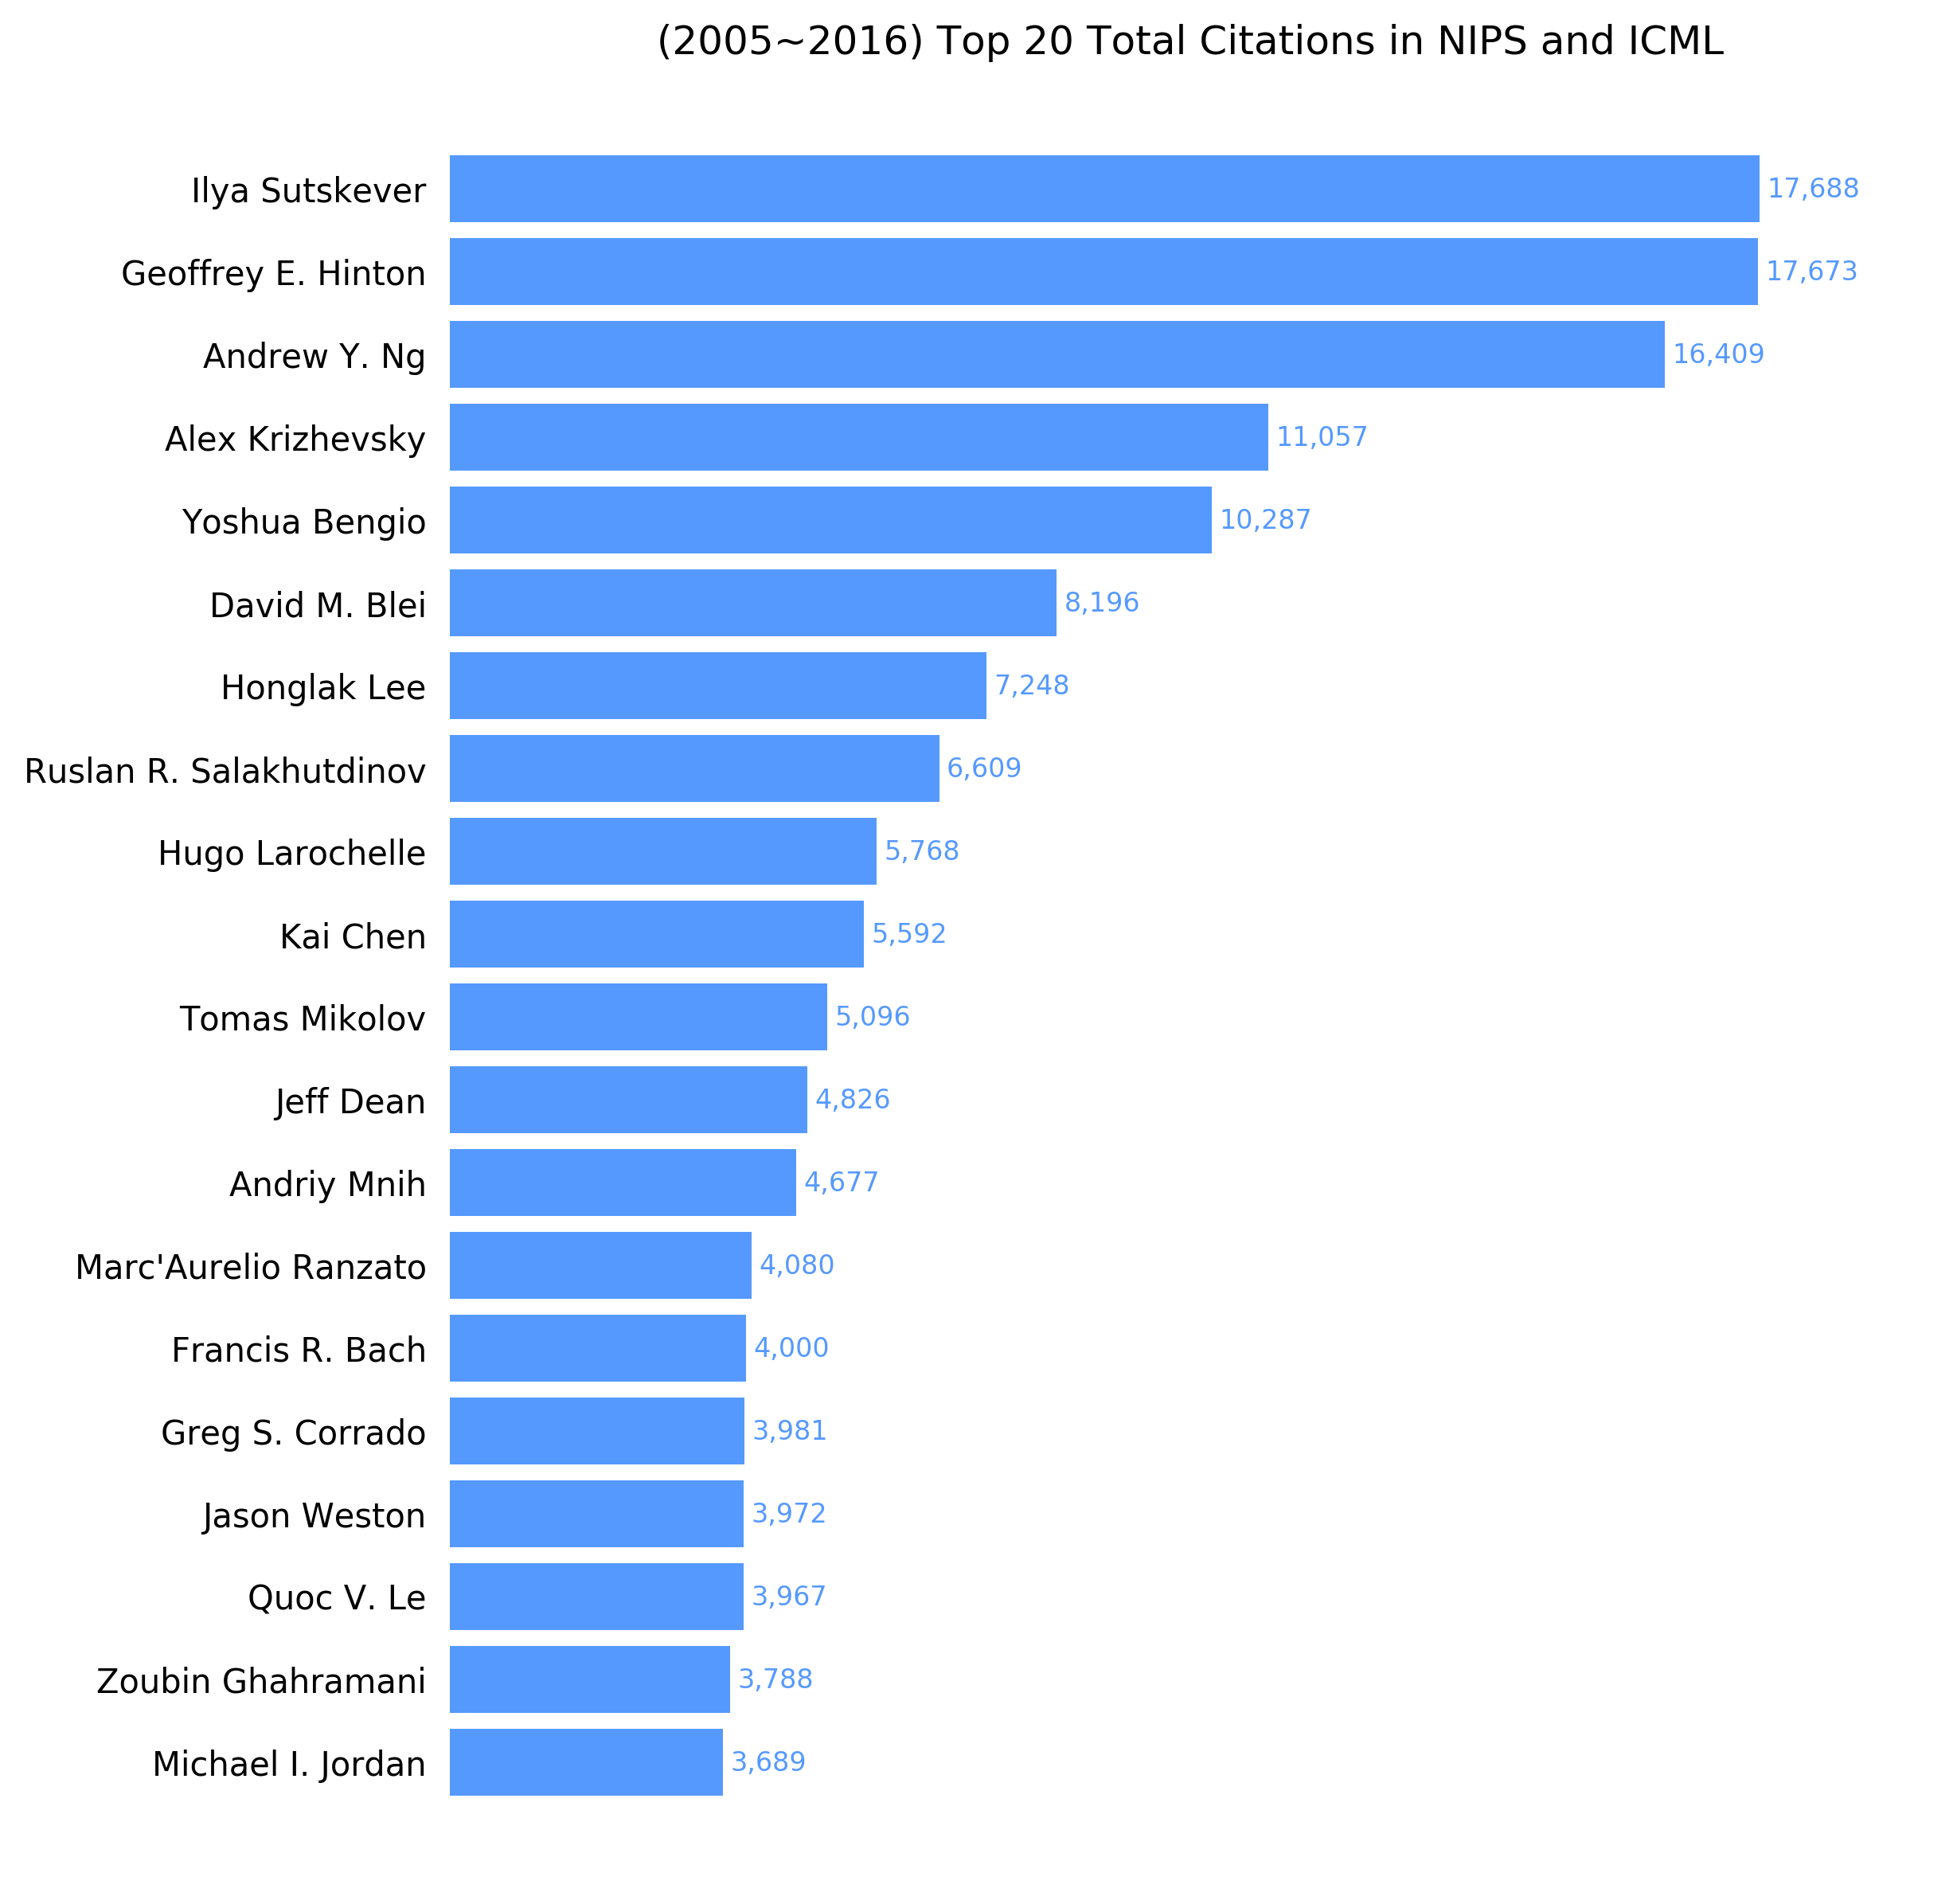

In [13]:
## 두 학회 가장 인용이 많이된 저자들 그래프 

plt.figure(figsize=(8, 10),dpi=my_dpi)
ax = plt.subplot(111) 
author = (df_cite_all['author'][:top_num])

y_pos = np.arange(len(author))
num_cite = df_cite_all['cite_num'][:top_num]

ax.barh(y_pos, num_cite, align='center', color='#5599ff', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(author)
ax.invert_yaxis()
plt.xticks(range(0, 21000, 2000), [format(x, ',') for x in range(0, 21000, 2000)], fontsize=10)
ax.set_title('(2005~2016) Top '+str(top_num)+' Total Citations in NIPS and ICML',fontsize=12)

for i in range(top_num):
    plt.text(num_cite[i]+100, y_pos[i]+0.1, format(num_cite[i], ','), fontsize=8, color='#5599ff')   

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="off", left="off", right="off", labelleft="on")    

plt.show()


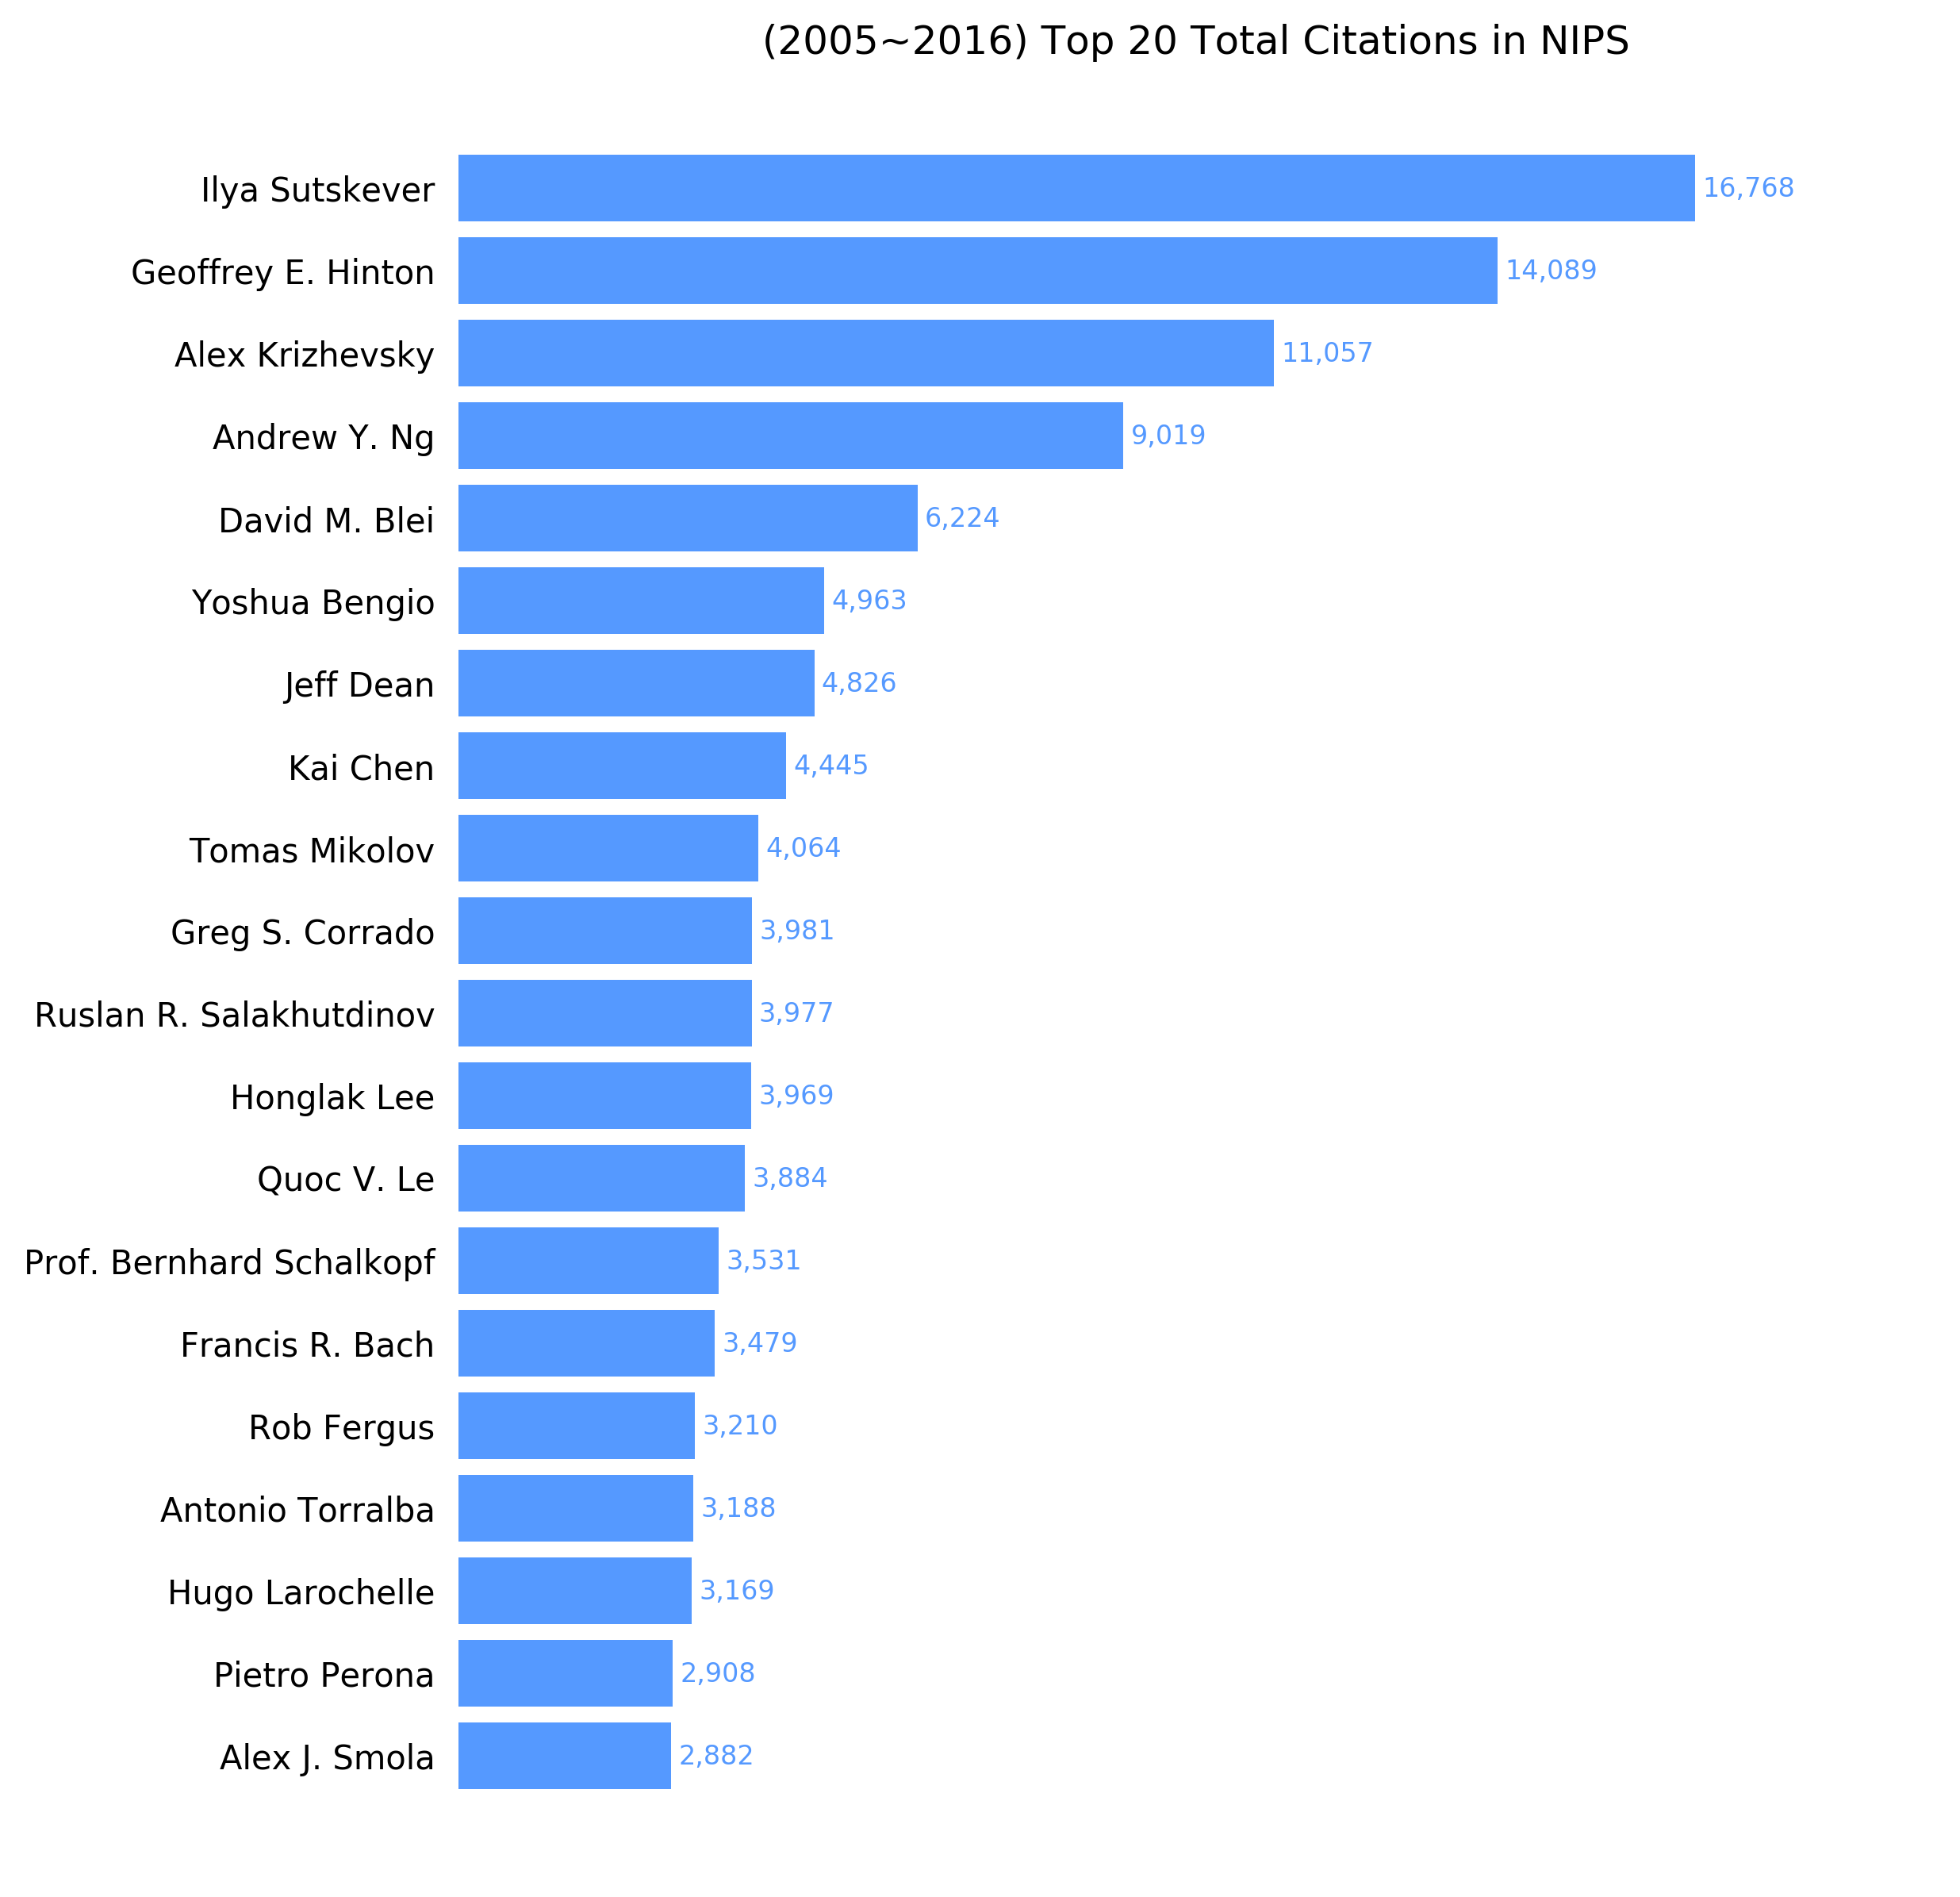

In [14]:

plt.figure(figsize=(8, 10),dpi=my_dpi)
ax = plt.subplot(111)  

author = (df_cite_nips['author'][:top_num])

y_pos = np.arange(len(author))
num_cite = df_cite_nips['cite_num'][:top_num]

ax.barh(y_pos, num_cite, align='center',
         color='#5599ff', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(author)
ax.invert_yaxis()
plt.xticks(range(0, 21000, 2000), [format(x, ',') for x in range(0, 21000, 2000)], fontsize=10)
ax.set_title('(2005~2016) Top '+str(top_num)+' Total Citations in NIPS',fontsize=12)

for i in range(top_num):
    plt.text(num_cite[i]+100, y_pos[i]+0.1, format(num_cite[i], ','), fontsize=8, color='#5599ff')   

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="off", left="off", right="off", labelleft="on")    

plt.show()

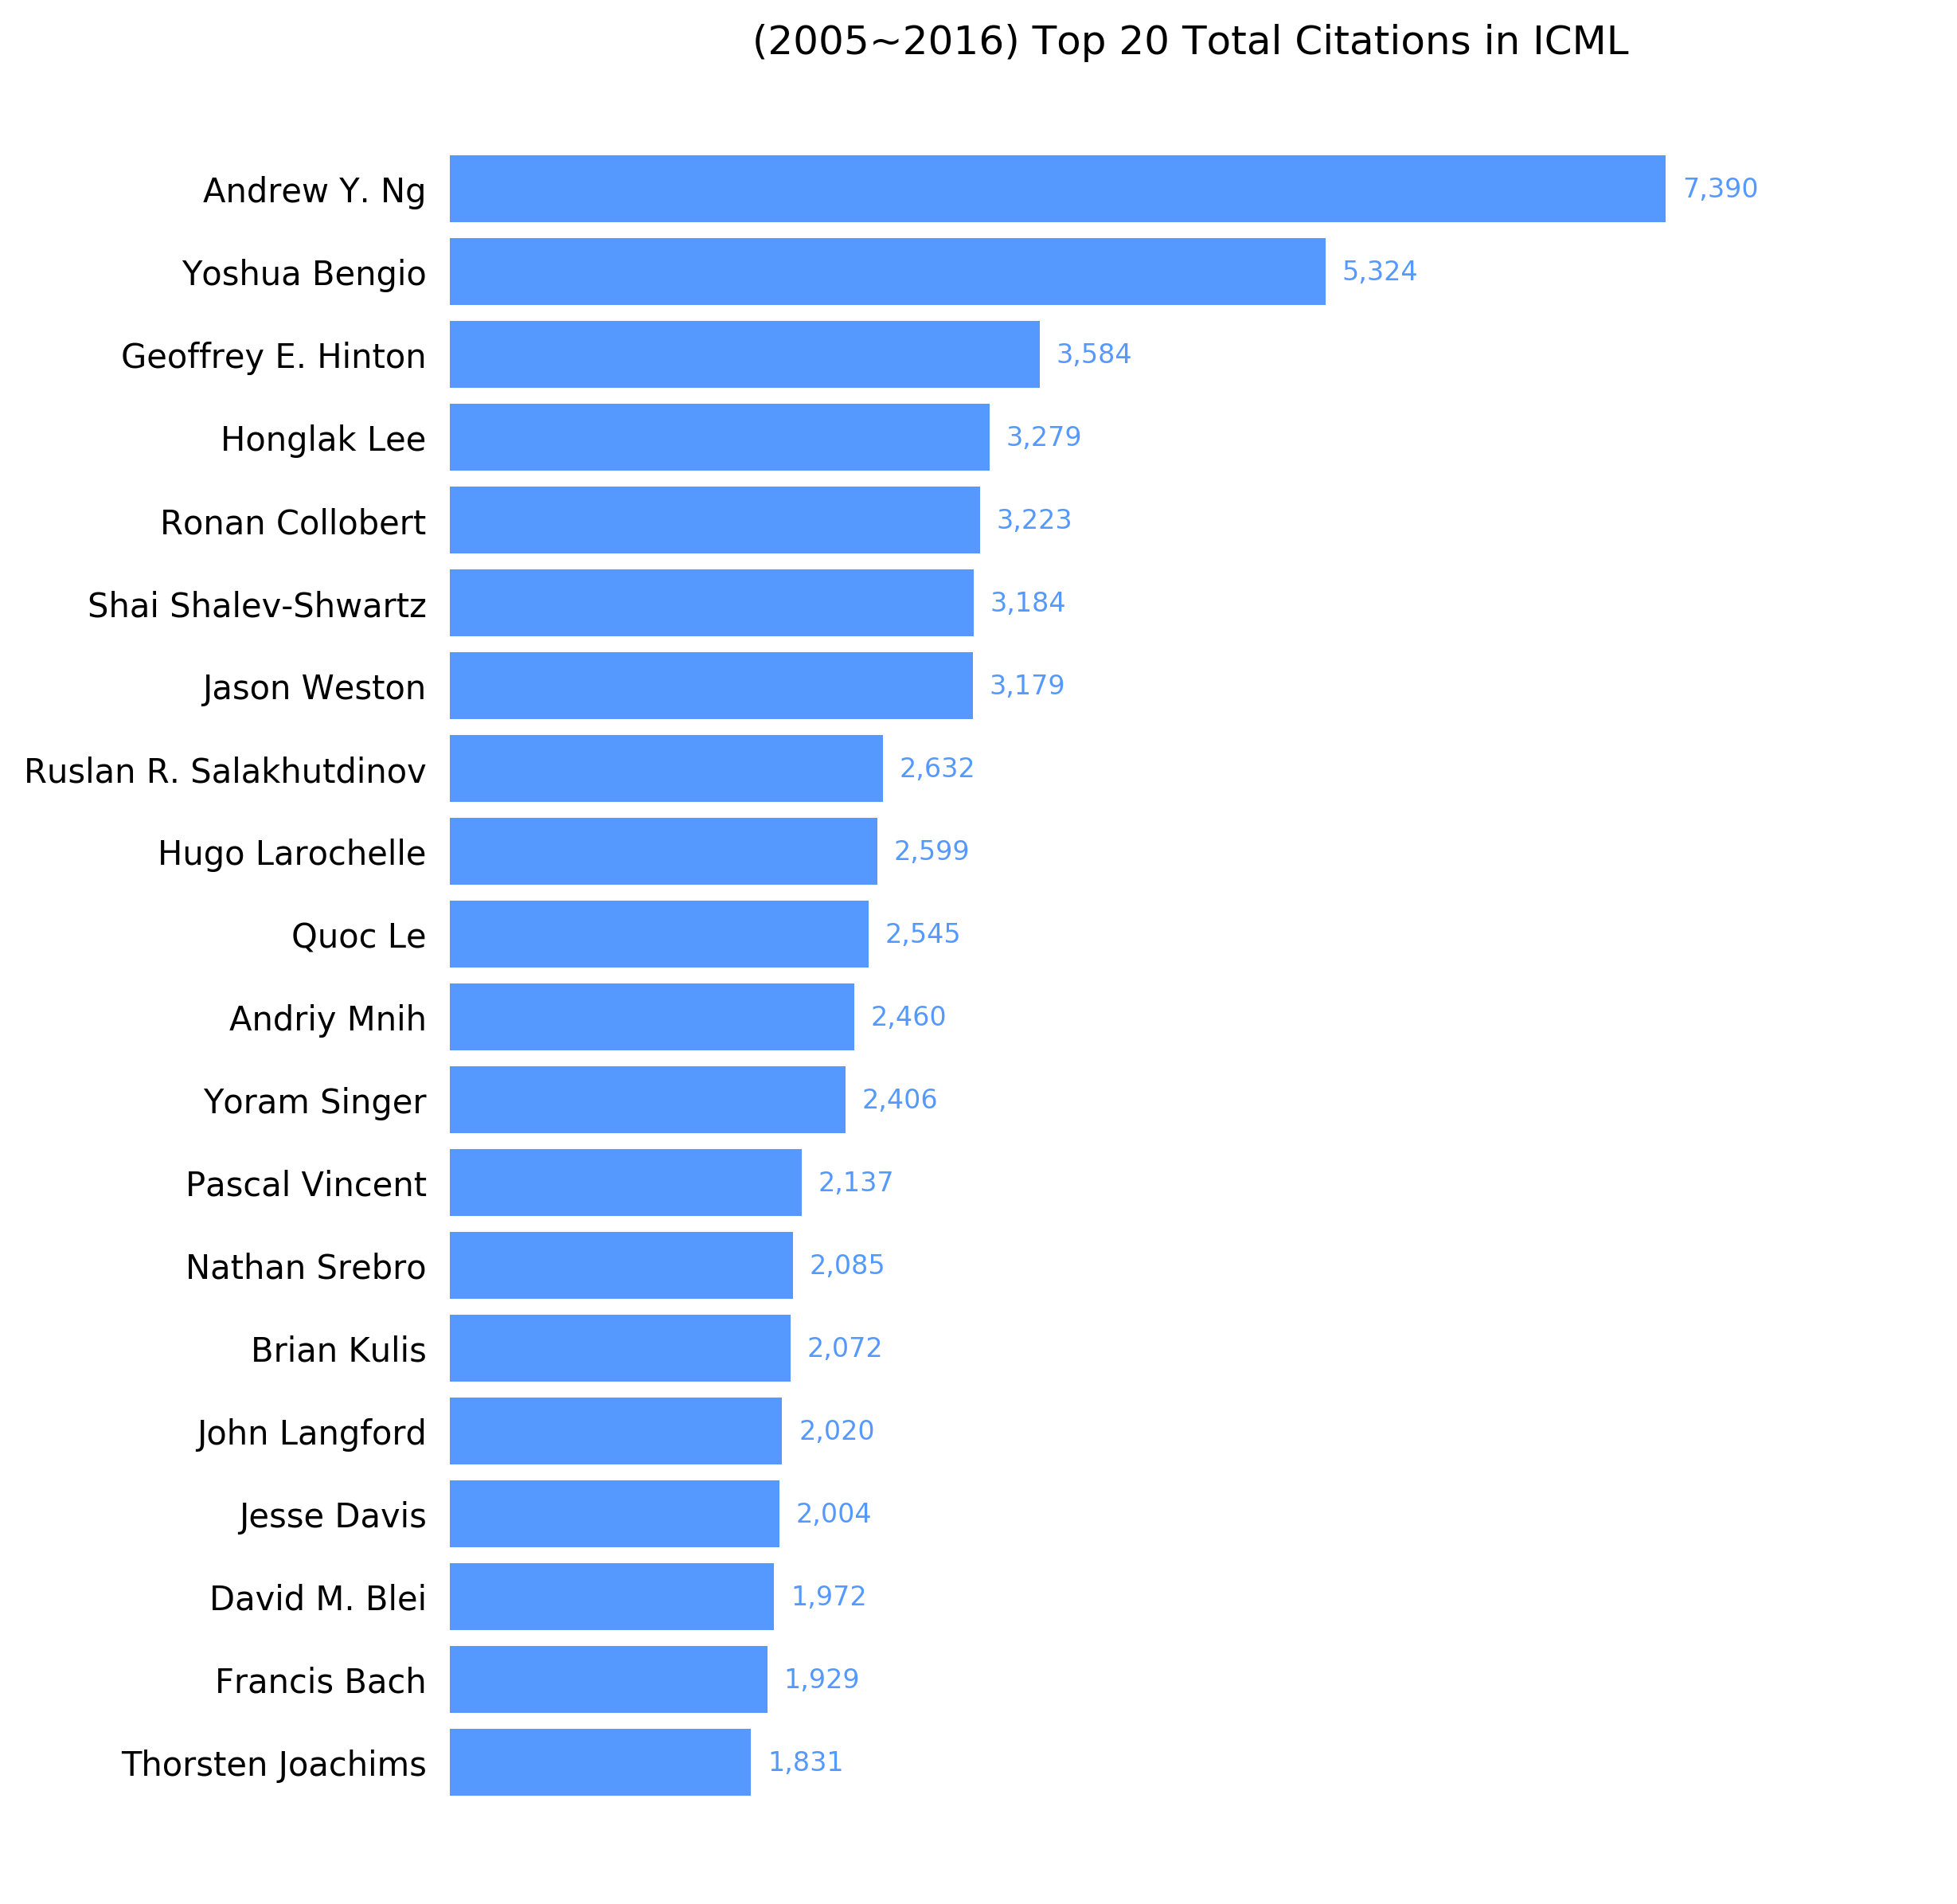

In [15]:
plt.figure(figsize=(8, 10),dpi=my_dpi)
ax = plt.subplot(111)  

author = (df_cite_icml['author'][:top_num])

y_pos = np.arange(len(author))
num_cite = df_cite_icml['cite_num'][:top_num]

ax.barh(y_pos, num_cite, align='center',
         color='#5599ff', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(author)
ax.invert_yaxis() 
plt.xticks(range(0, 10000, 1000), [format(x, ',') for x in range(0, 10000, 1000)], fontsize=10)
ax.set_title('(2005~2016) Top '+str(top_num)+' Total Citations in ICML',fontsize=12)

for i in range(top_num):
    plt.text(num_cite[i]+100, y_pos[i]+0.1, format(num_cite[i], ','), fontsize=8, color='#5599ff')   

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="off", left="off", right="off", labelleft="on")    

plt.show()

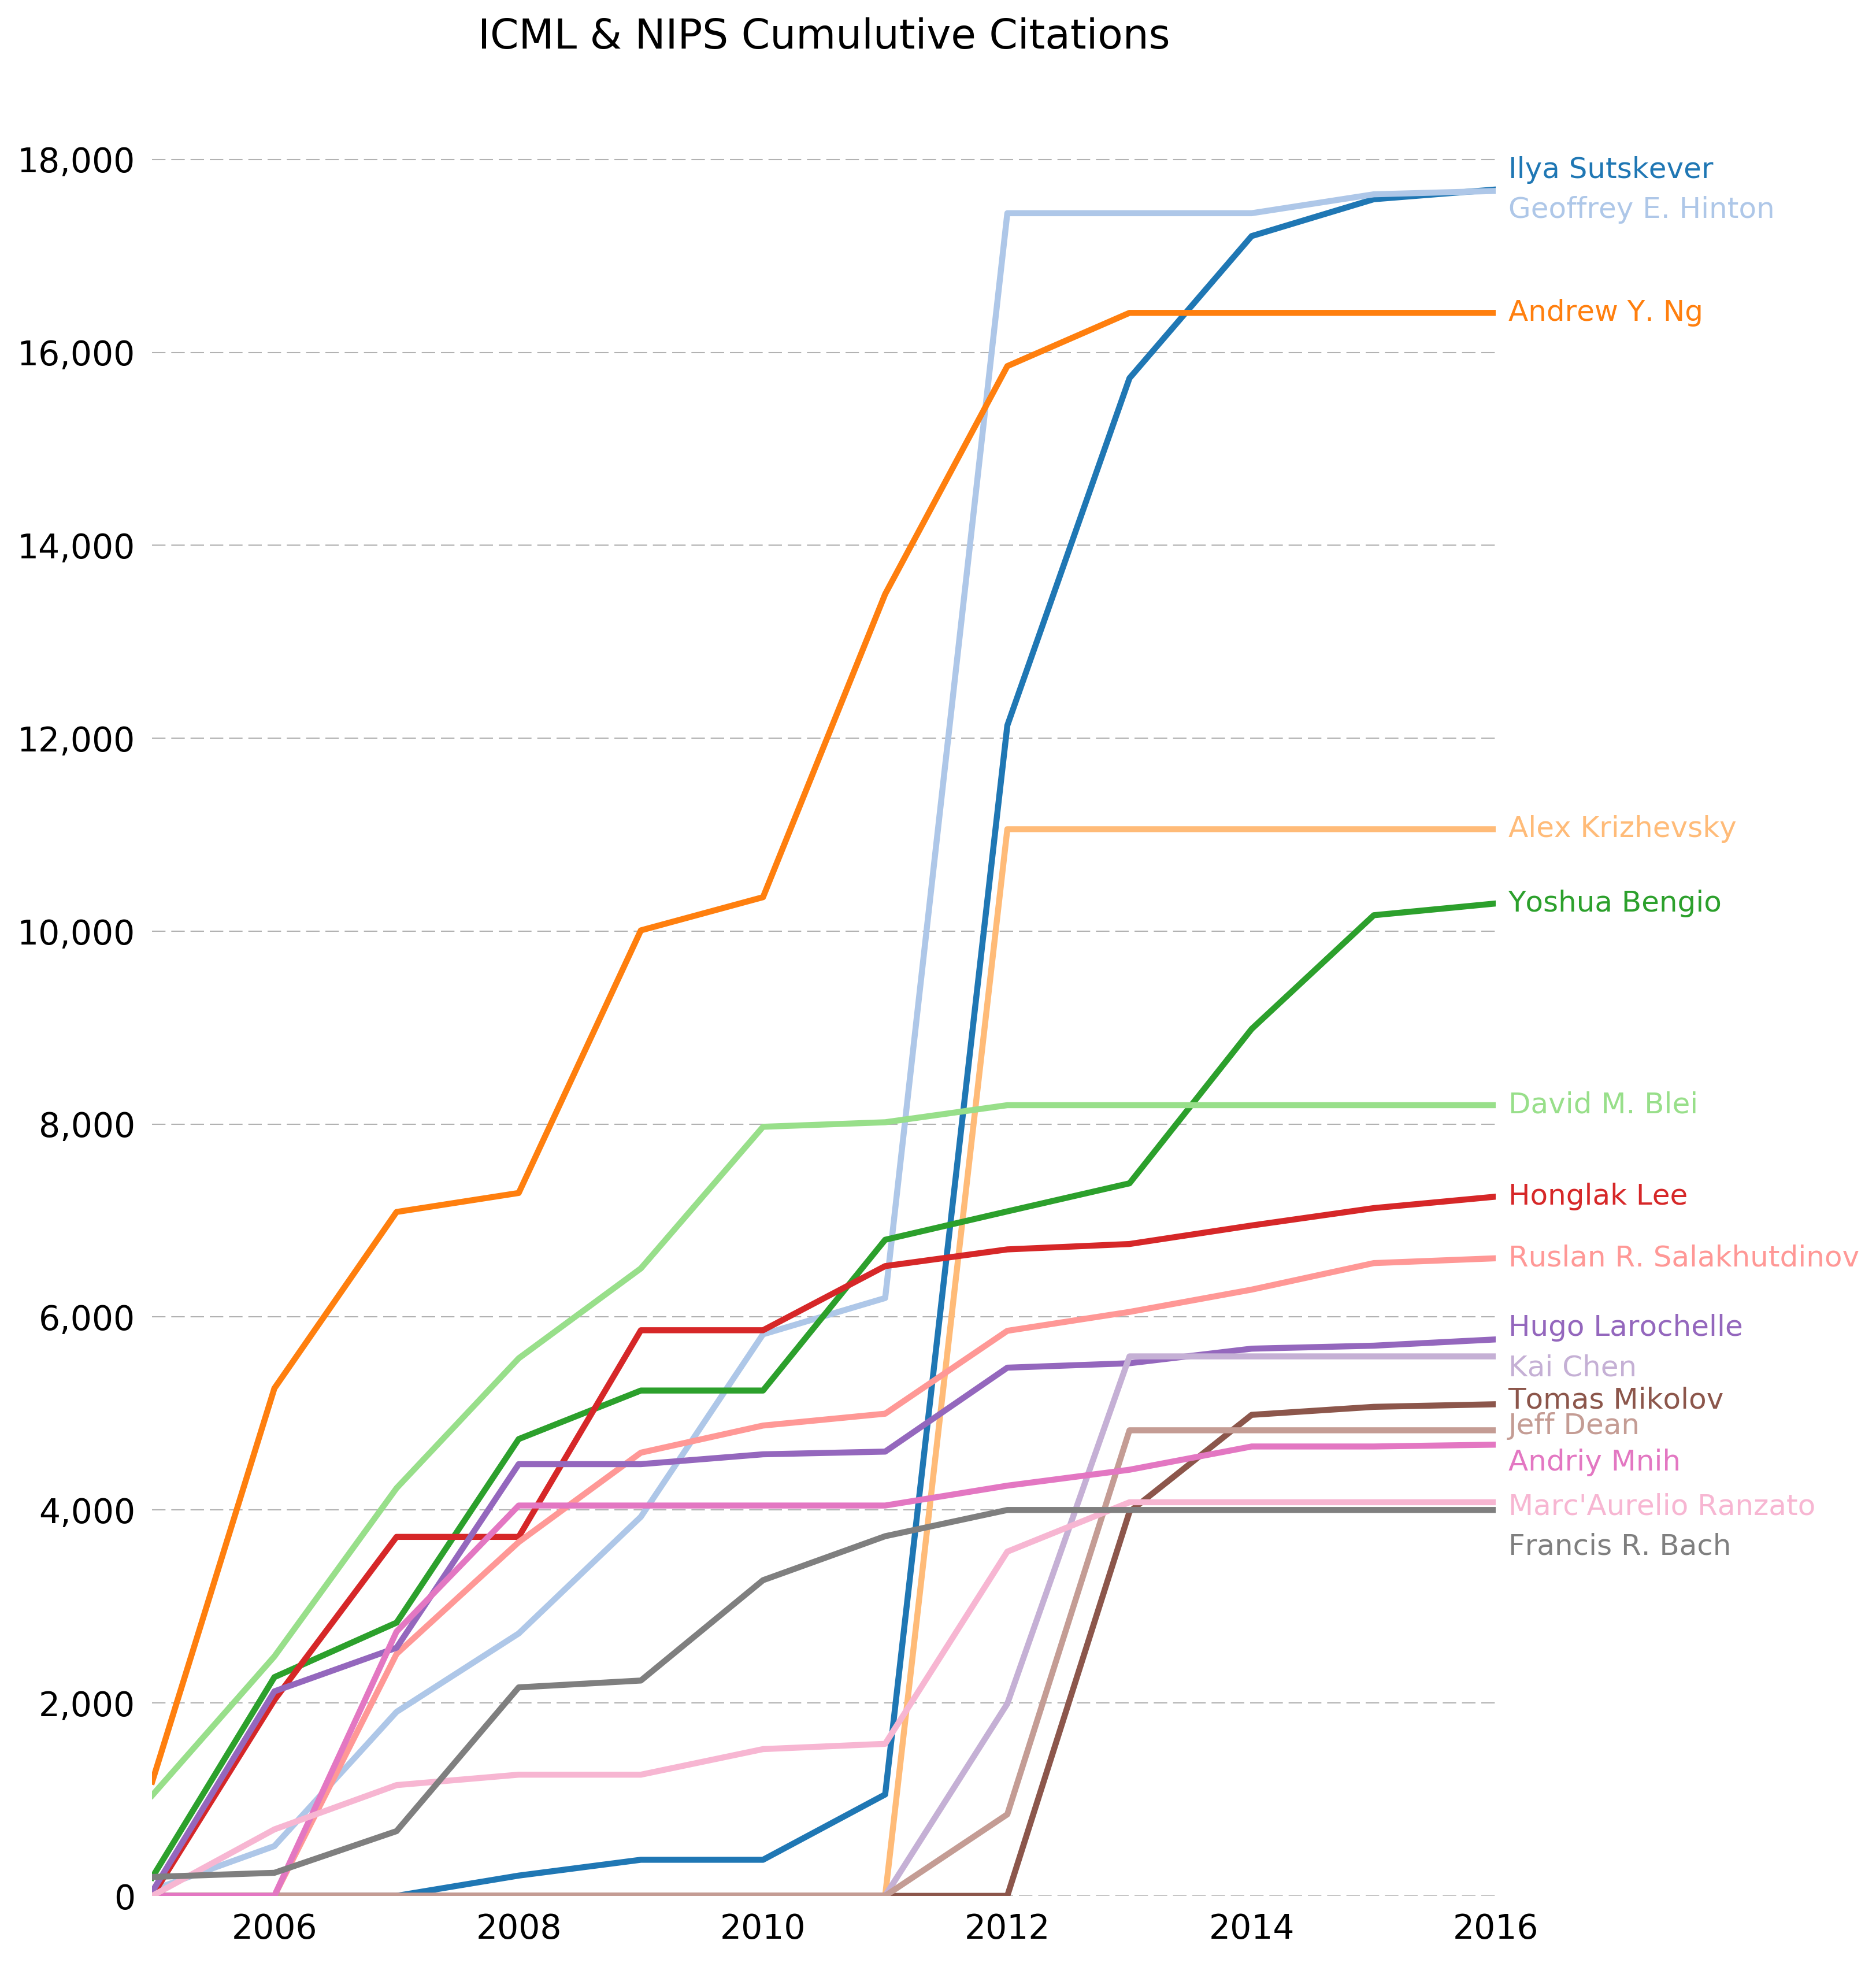

In [16]:
## 연도별 누적 인용 횟수 상위 저자들 

df_cite_cul = pd.read_excel("cite_cul_df.xlsx")

top_num = 15
  
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

plt.figure(figsize=(10, 14),dpi=my_dpi)    
    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
     
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
   
plt.ylim(0, 19000)    
plt.xlim(2005, 2016)   

  
plt.yticks(range(0, 19000, 2000), [format(x, ',') for x in range(0, 19000, 2000)], fontsize=14)  
plt.xticks(fontsize=14)    
      
for y in range(0, 19000, 2000):    
    plt.plot(range(2005, 2017), [y] * len(range(2005, 2017)), "--", lw=0.5, color="black", alpha=0.3)    
    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
author = (df_cite_all['author'][:top_num].tolist())
  
for rank, column in enumerate(author):    
    plt.plot(df_cite_cul.Year.values,    
            df_cite_cul[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])    
   
    y_pos = df_cite_cul[column.replace("\n", " ")].values[-1] -80
    if column == author[0]:    
        y_pos += 200    
    elif column == author[1]:    
        y_pos -= 200    
    elif column == author[8]:    
        y_pos += 120     
    elif column == author[9]:    
        y_pos -= 120
    elif column == author[-5]:    
        y_pos += 40  
    elif column == author[-4]:    
        y_pos += 40  
    elif column == author[-3]:    
        y_pos -= 190    
    elif column == author[-2]:    
        y_pos -= 50    
    elif column == author[-1]:    
        y_pos -= 380    
  
    plt.text(2016.1, y_pos, column, fontsize=12, color=tableau20[rank])    

plt.title("ICML & NIPS Cumulutive Citations",fontsize=17)
  

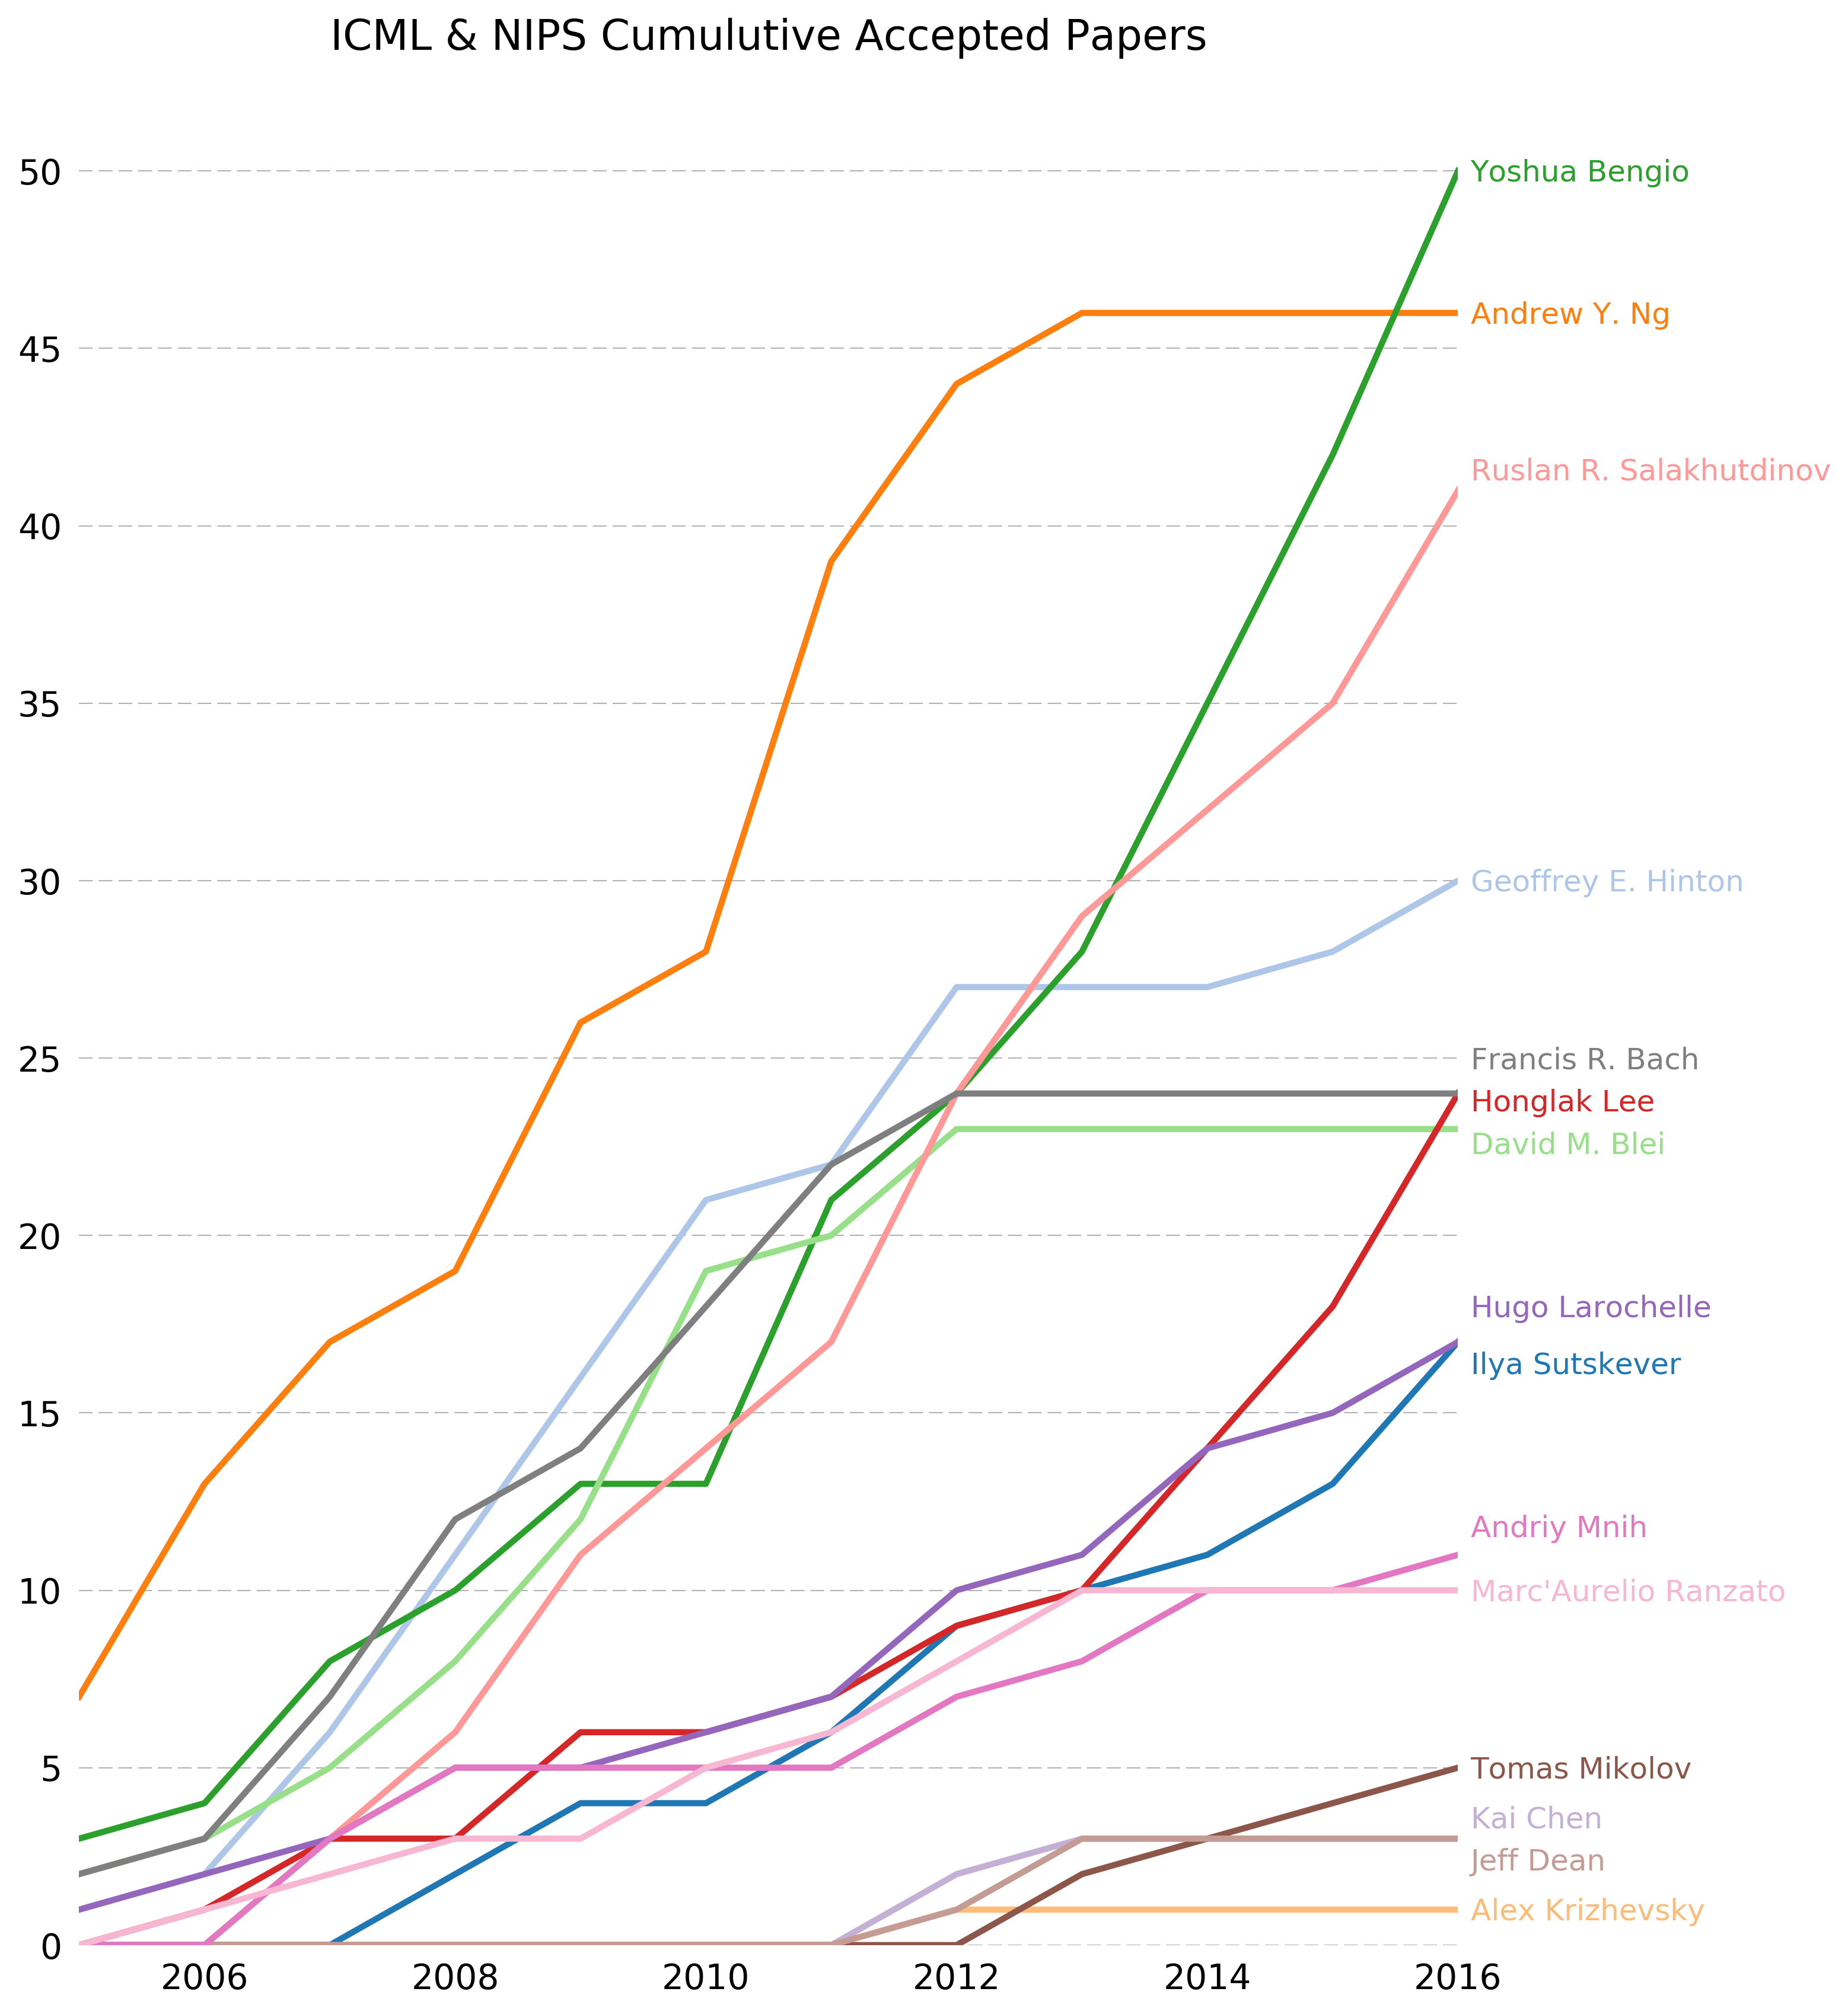

In [17]:

df_cite_cul = pd.read_excel("paper_cul_df.xlsx")    
  
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
    
plt.figure(figsize=(10, 14),dpi=my_dpi)    
    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
    
plt.ylim(0, 53)    
plt.xlim(2005, 2016)   

plt.yticks(range(0, 53, 5), [format(x, ',') for x in range(0, 53, 5)], fontsize=14)  
plt.xticks(fontsize=14)    
  
for y in range(0, 53, 5):    
    plt.plot(range(2005, 2017), [y] * len(range(2005, 2017)), "--", lw=0.5, color="black", alpha=0.3)    
     
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
author = (df_cite_all['author'][:top_num].tolist())    
  
for rank, column in enumerate(author):      
    plt.plot(df_cite_cul.Year.values,    
            df_cite_cul[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])    
   
    y_pos = df_cite_cul[column.replace("\n", " ")].values[-1] -0.3
    if column == author[5]:    
        y_pos -= 0.4    
    elif column == author[12]:    
        y_pos += 0.8    
    elif column == author[6]:    
        y_pos -= 0.2     
    elif column == author[0]:    
        y_pos -= 0.6     
    elif column == author[7]:    
        y_pos += 0.6  
    elif column == author[8]:    
        y_pos += 1    
    elif column == author[14]:    
        y_pos += 1        
    elif column == author[-4]:    
        y_pos -= 0.6    
    elif column == author[-6]:    
        y_pos += 0.6    

    plt.text(2016.1, y_pos, column, fontsize=12, color=tableau20[rank])    
  
plt.title("ICML & NIPS Cumulutive Accepted Papers",fontsize=17)
  

In [31]:
## 논문 제목 keword의 Wordcloud분석 

max_words=100
img_size_x = 600
img_size_y = 400
replace_text = ['Learning','Model','learning','model','via', 'Using', 'using' ]
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)


def keyword_wordcloud(conf, year):
    tmp_text = df[(df['Conf']== conf)&(df['Year']== year)].Title.tolist()
    text = ' '.join(tmp_text)

    for i in range(len(replace_text)):
        text = text.replace(replace_text[i], '')

    wordcloud = WordCloud(background_color="white", max_words=max_words, width=img_size_x, height=img_size_y).generate(text)

    plt.figure(dpi=my_dpi)
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=0), interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

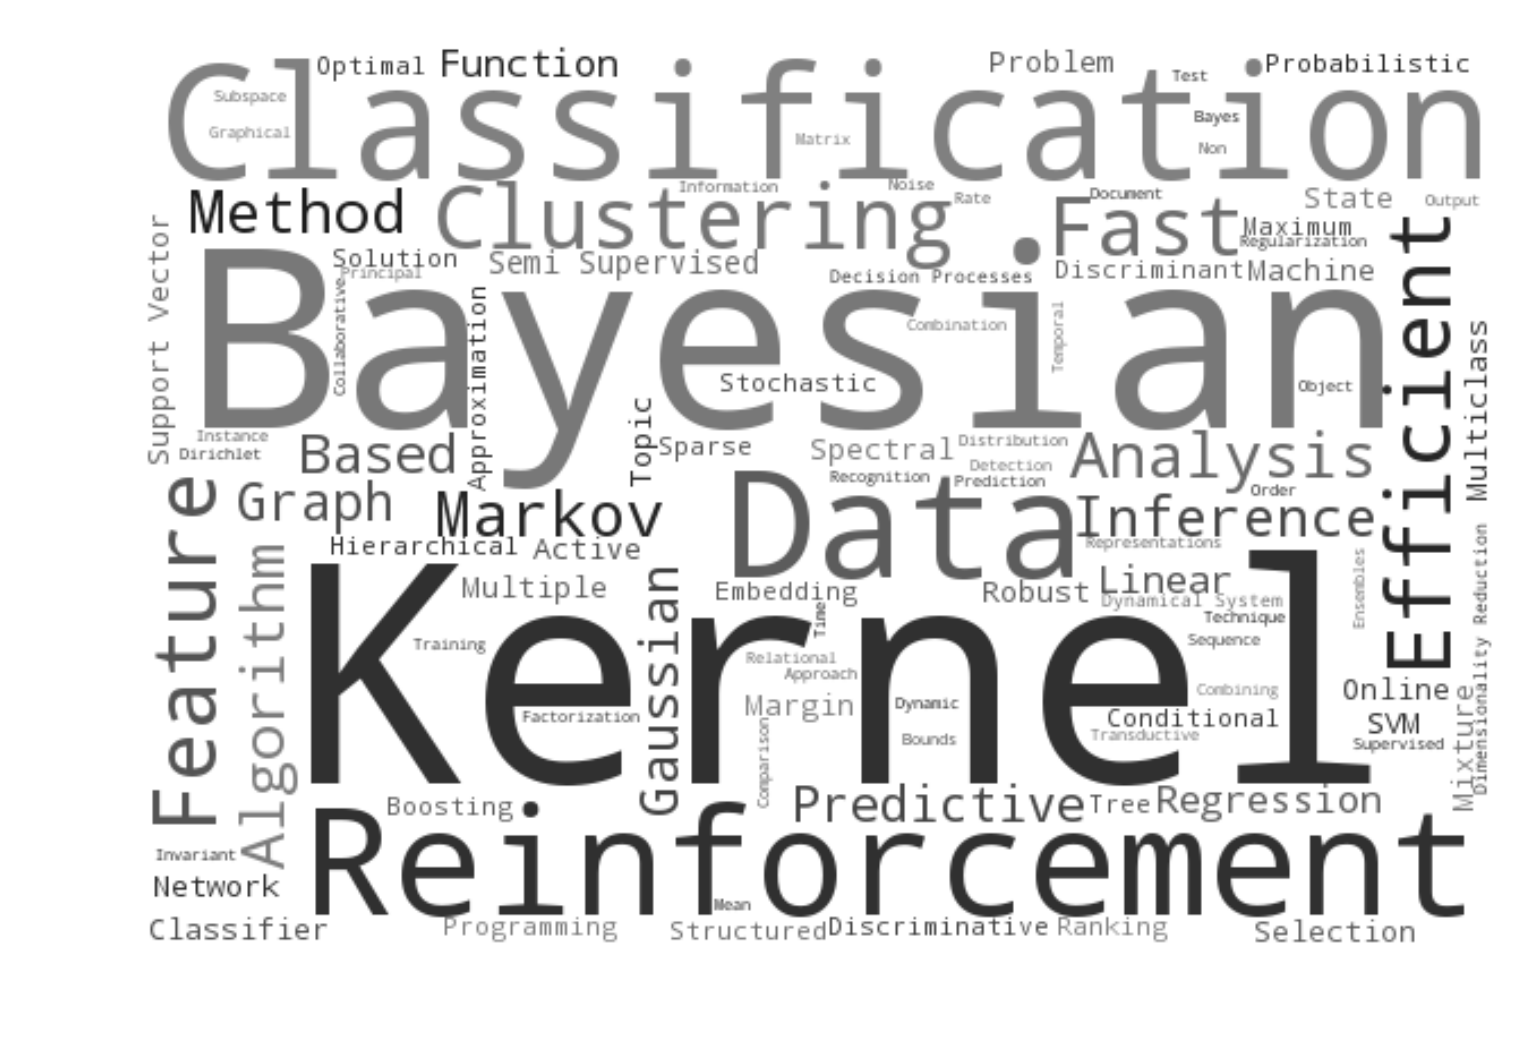

In [32]:
## ICML 2006
conf = 'ICML'
year = 2006

keyword_wordcloud(conf, year)

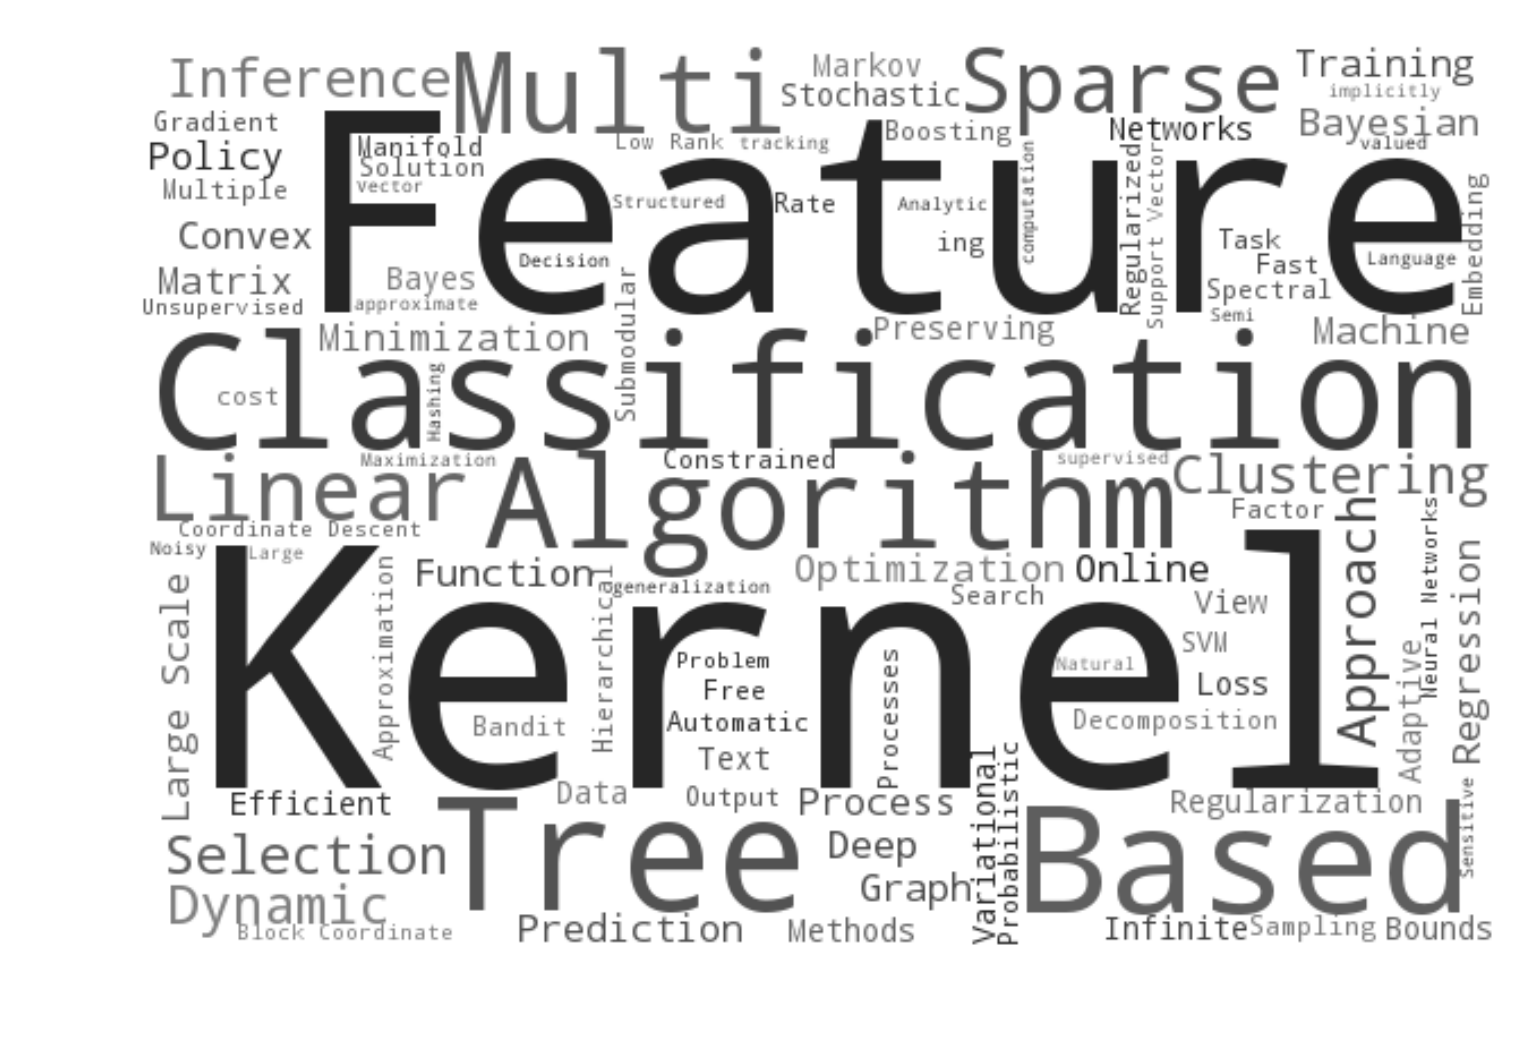

In [33]:
## ICML 2011
conf = 'ICML'
year = 2011

keyword_wordcloud(conf, year)

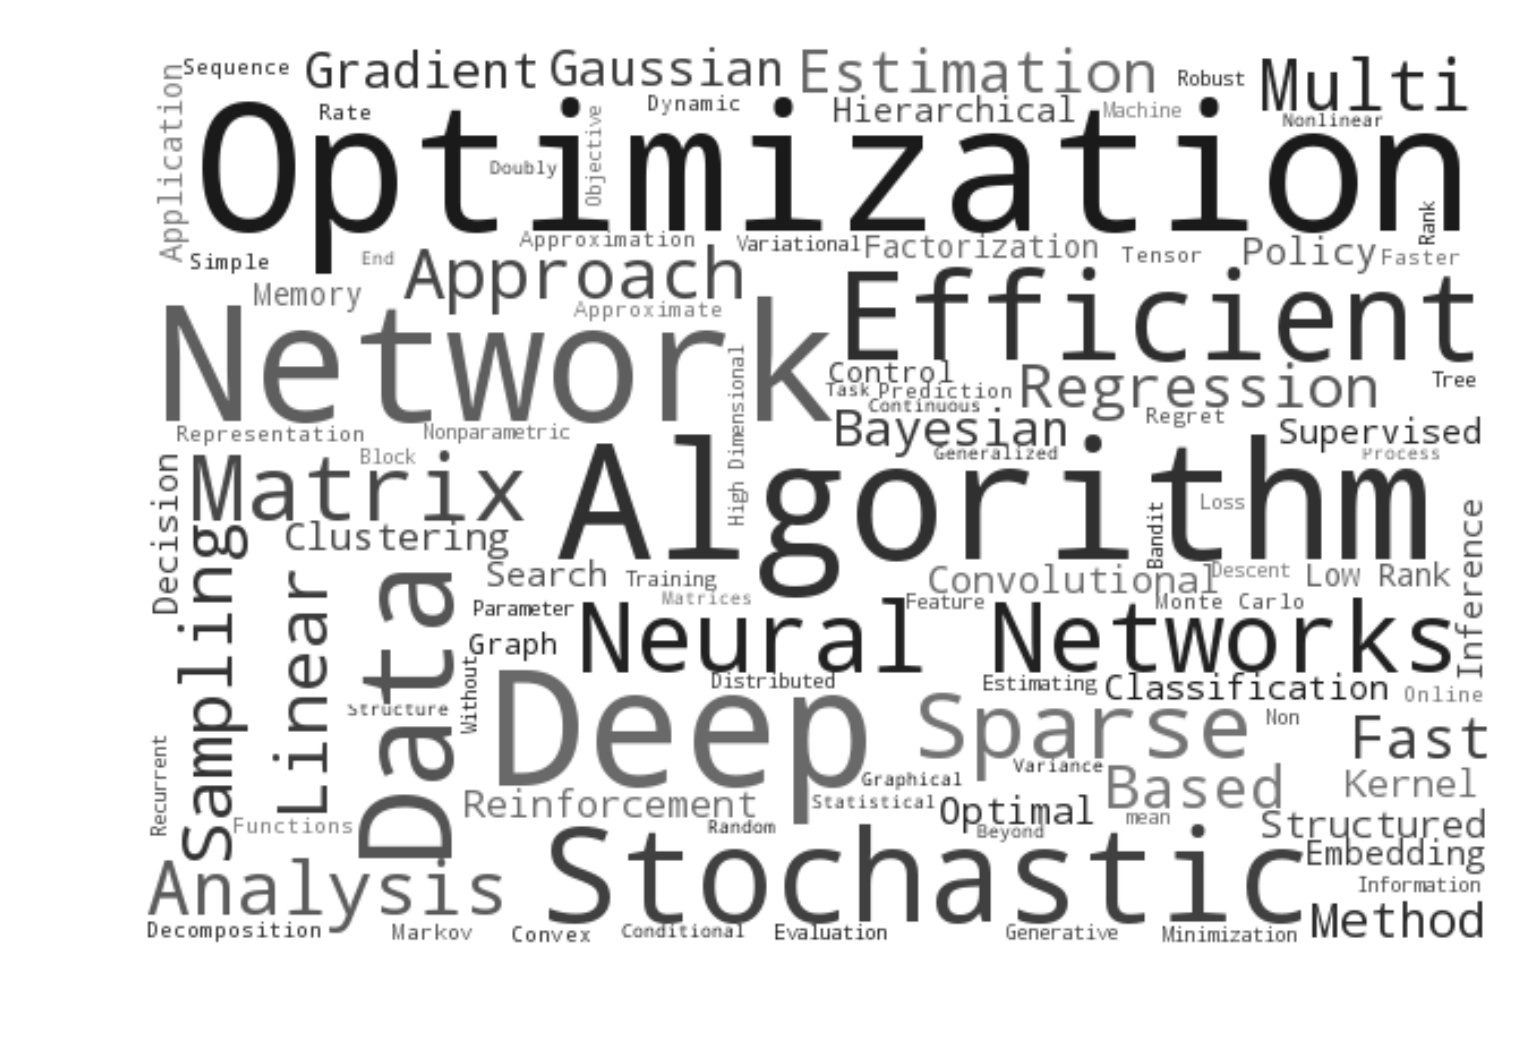

In [34]:
## ICML 2016
conf = 'ICML'
year = 2016

keyword_wordcloud(conf, year)

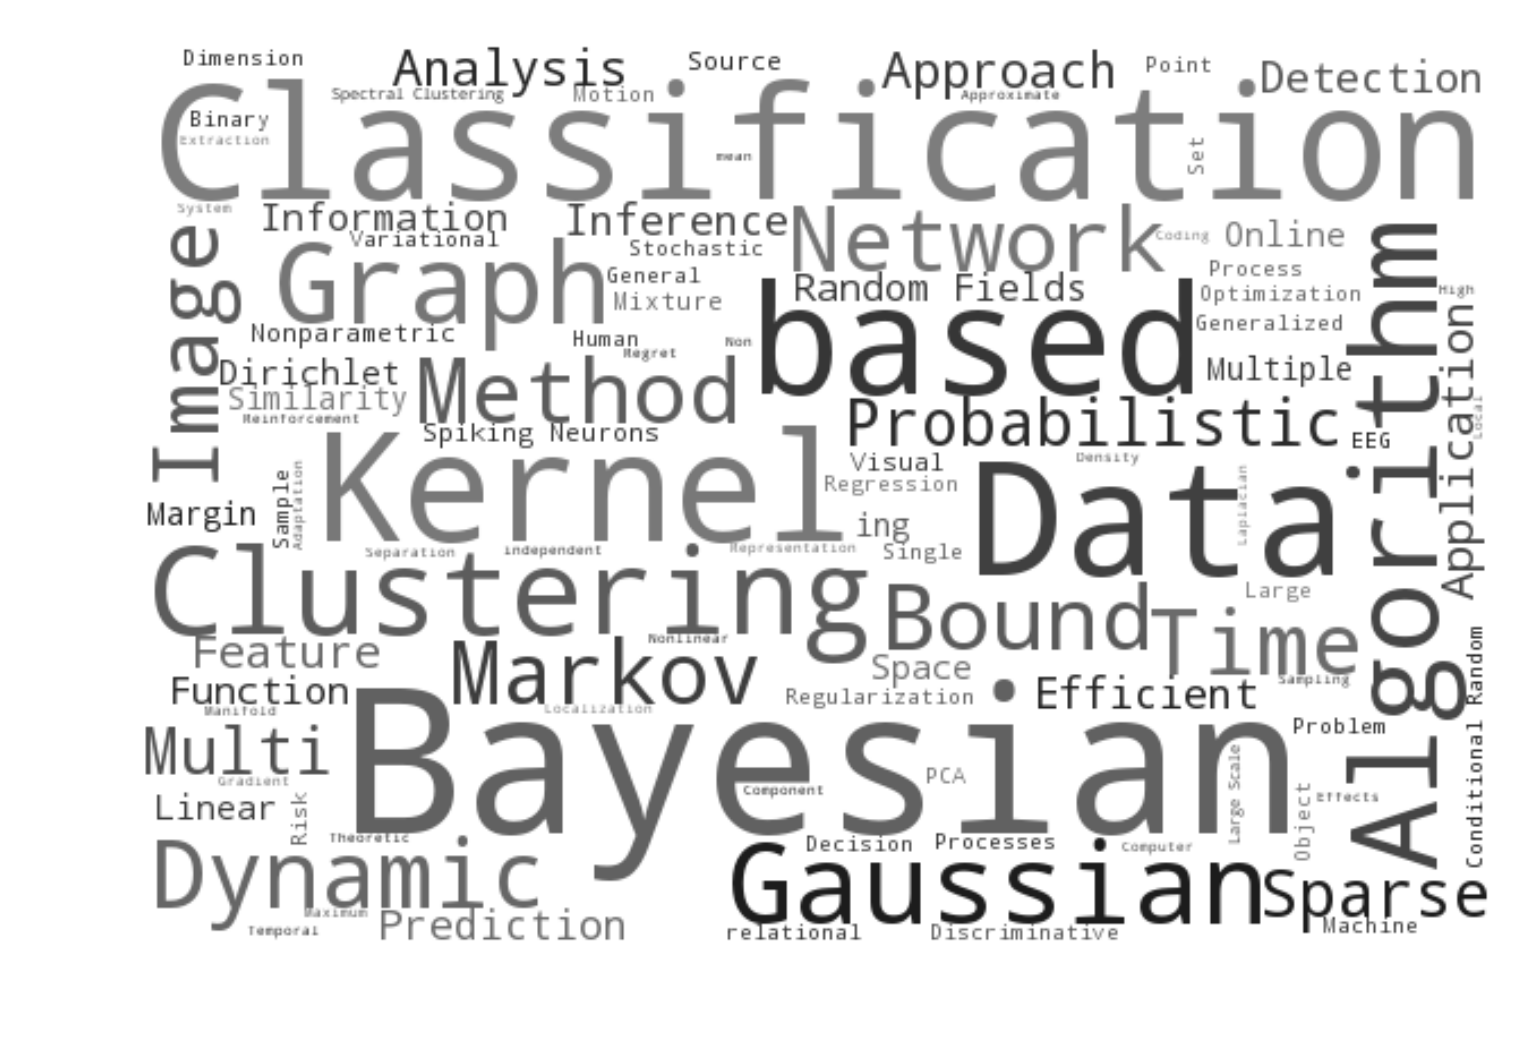

In [35]:
## NIPS 2006
conf = 'NIPS'
year = 2006

keyword_wordcloud(conf, year)

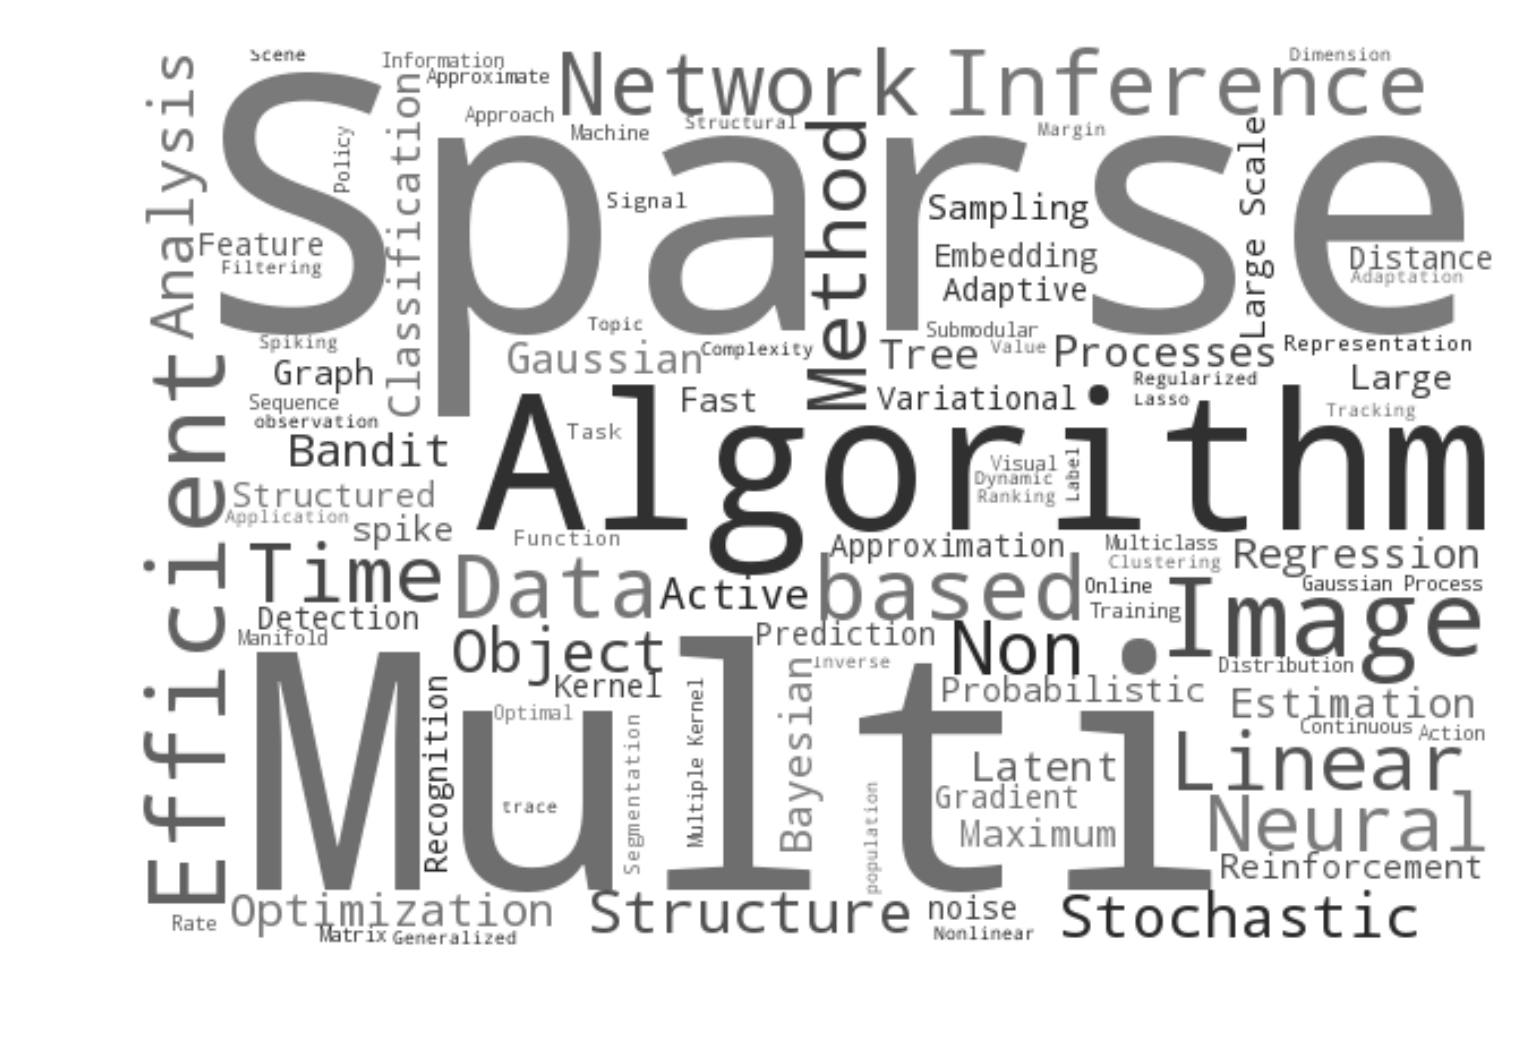

In [36]:
## NIPS 2011
conf = 'NIPS'
year = 2011

keyword_wordcloud(conf, year)

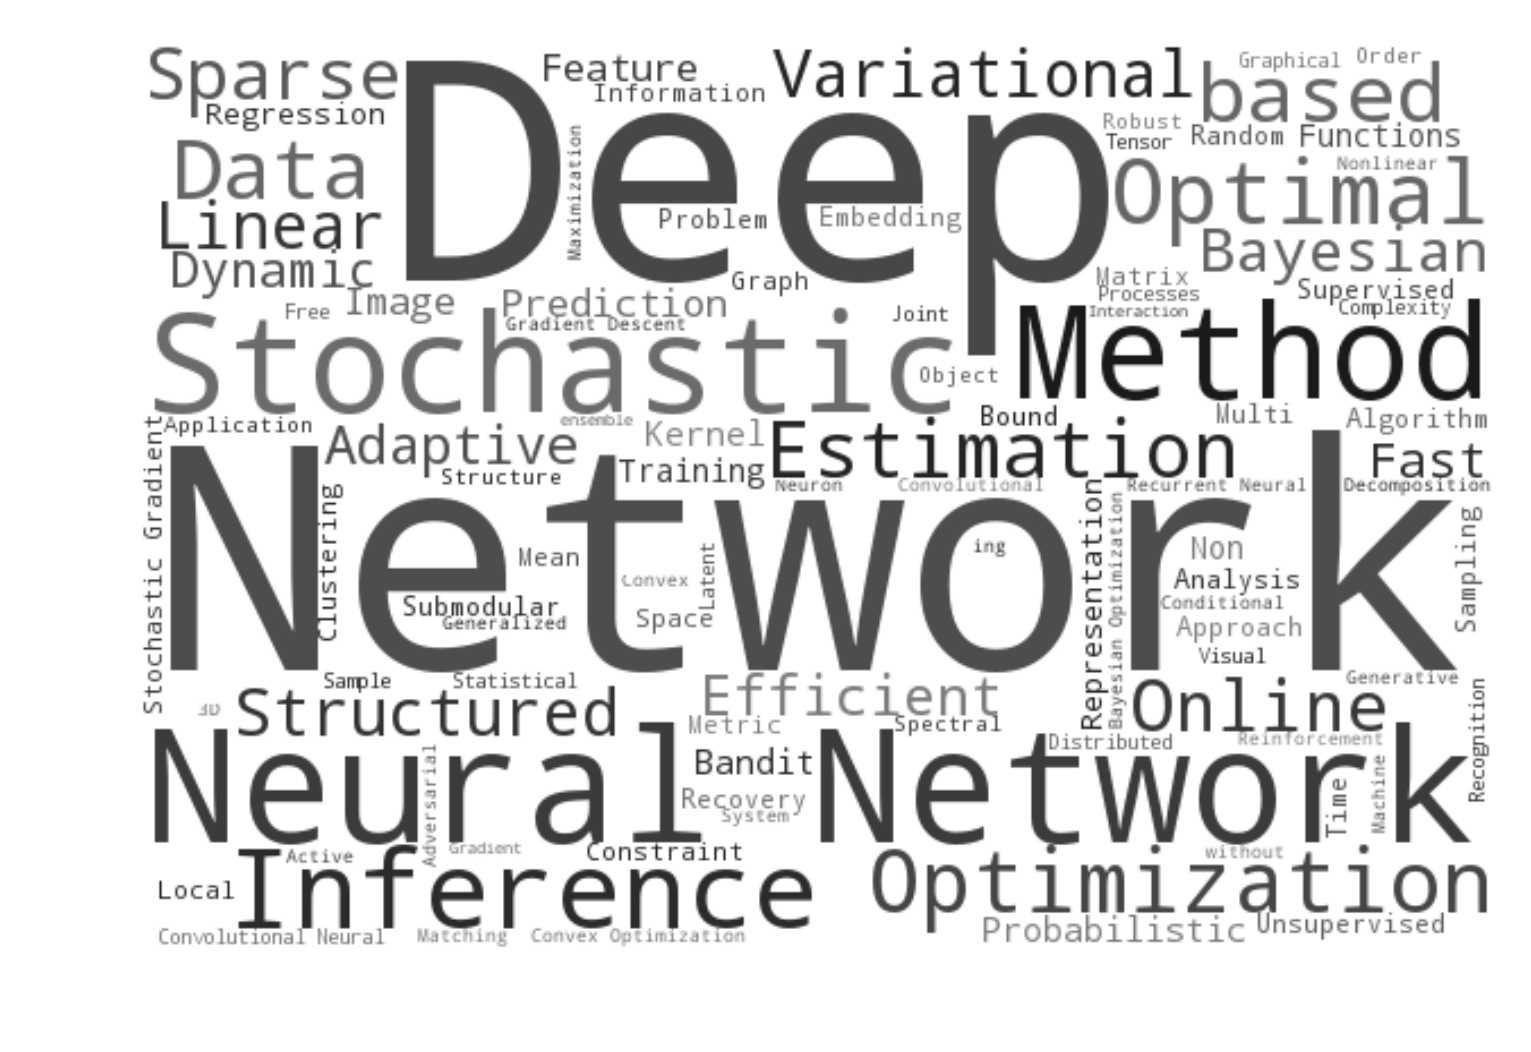

In [37]:
## NIPS 2016
conf = 'NIPS'
year = 2016

keyword_wordcloud(conf, year)

In [49]:
## 연도별 논문 제목에 등장한 keyword 횟수

# 논문 keyword중 분석에서 제외할 단어들
replace_data = [':','?','for', 'a','an' ,'in', 'of', 'with', 'and', 'the', 
                'to', 'on', 'from', 'by', 'using', 'very', 'via', 'it', 'that',
                'as', ',','which','-','through','without','while', 'is',
                'than', 'where', 'much','many', 'or', 'so'
               ]

## 체크해볼 주요 단어들
chk_keywords = [
                'learning', 'models', 'deep', 
                'networks', 'neural', 'stochastic', 
                'optimization', 'inference', 'recurrent',
                'regression','bayesian','feature'
                ]


In [50]:
conf = 'NIPS'

for i in range(len(list_year)):
    
    year = list_year[i]
    title_list = df[(df['Conf']==conf)&(df['Year']==year)].Title.str.lower()

    title_list = title_list.str.replace(':', '')
    title_list = title_list.str.replace('?', '')

    title_words = [a.split() for a in title_list]

    counter = Counter(chain.from_iterable(title_words))

    words_set = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    col_name = 'count_'+str(year)
    words_set = words_set.rename(columns={'index':'words', 0:col_name})
    words_set = words_set.sort([col_name], ascending=False)
    print (len(words_set))
    words_set = words_set[~words_set['words'].isin(replace_data)]
    words_set = words_set.reset_index()
    words_set = words_set.drop('index',1)
    
    t_tmp = len(title_list)
    
    if i == 0 :
        df_y_2005 = words_set
    if i == 1 :
        df_y_2006 = words_set
    if i == 2 :
        df_y_2007 = words_set
    if i == 3 :
        df_y_2008 = words_set
    if i == 4 :
        df_y_2009 = words_set
    if i == 5 :
        df_y_2010 = words_set
    if i == 6 :
        df_y_2011 = words_set
    if i == 7 :
        df_y_2012 = words_set
    if i == 8 :
        df_y_2013 = words_set
    if i == 9 :
        df_y_2014 = words_set
    if i == 10 :
        df_y_2015 = words_set
    if i == 11 :
        df_y_2016 = words_set



dfs = [df_y_2005,df_y_2006,df_y_2007, df_y_2008, df_y_2009, 
       df_y_2010, df_y_2011, df_y_2012, df_y_2013, df_y_2014, df_y_2015, df_y_2016]

df_final = functools.reduce(lambda left, right: pd.merge(left, right, on='words', how='outer'), dfs)

df_final = df_final.set_index(['words'])
df_final.head()

725
665
730
844
851
952
914
1074
1077
1114
1120
1475


/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


count_2005  count_2006  count_2007  count_2008  count_2009  \
words                                                                  
learning        40.0        42.0        47.0        53.0        60.0   
models          16.0        15.0        14.0        22.0        24.0   
gaussian        14.0         8.0         6.0        10.0         7.0   
analysis        13.0         7.0        15.0        11.0        14.0   
visual          10.0         5.0         4.0         4.0         6.0   

          count_2010  count_2011  count_2012  count_2013  count_2014  \
words                                                                  
learning        63.0        79.0        92.0        79.0        86.0   
models          20.0        25.0        32.0        32.0        41.0   
gaussian         8.0        13.0        13.0        13.0        15.0   
analysis        12.0        13.0        11.0         7.0        13.0   
visual           5.0         5.0         6.0         6.0         3.0   

          count_2015  count_2016  
words                             
learning        79.0       126.0  
models          35.0        42.0  
gaussian        12.0         9.0  
analysis        15.0        12.0  
visual           3.0         8.0

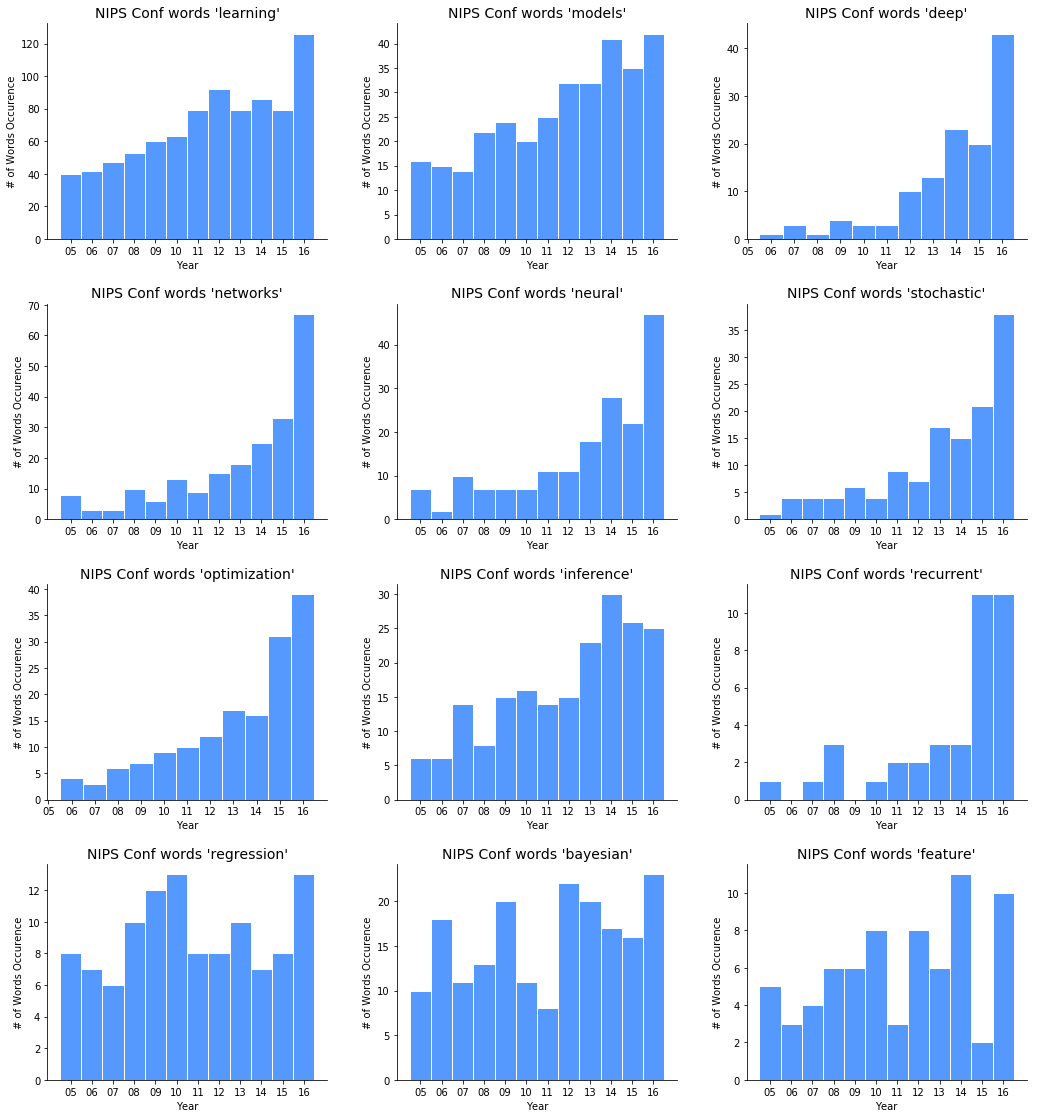

In [51]:
## 주요 단어들의 연도별 등장 횟수 변화 
fig = plt.figure(figsize=(16, 36))

for i in range(len(chk_keywords)):
    values = (df_final.ix[[chk_keywords[i]]].values)
    
    ax=plt.subplot(8,3, i+1)
    plt.bar(list_year, values[0],width=1.0, color='#5599FF', edgecolor='white')
    
    
    plt.xlabel('Year')
    plt.ylabel("# of Words Occurence")
    plt.title(conf+" Conf words '"+chk_keywords[i]+"'", size=14)
    plt.xticks(list_year, list_name, fontsize=10,color='black')
    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True)  

    plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                    labelbottom="on", left="on", right="off", labelleft="on") 

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.25) 


([], <a list of 0 Text yticklabel objects>)

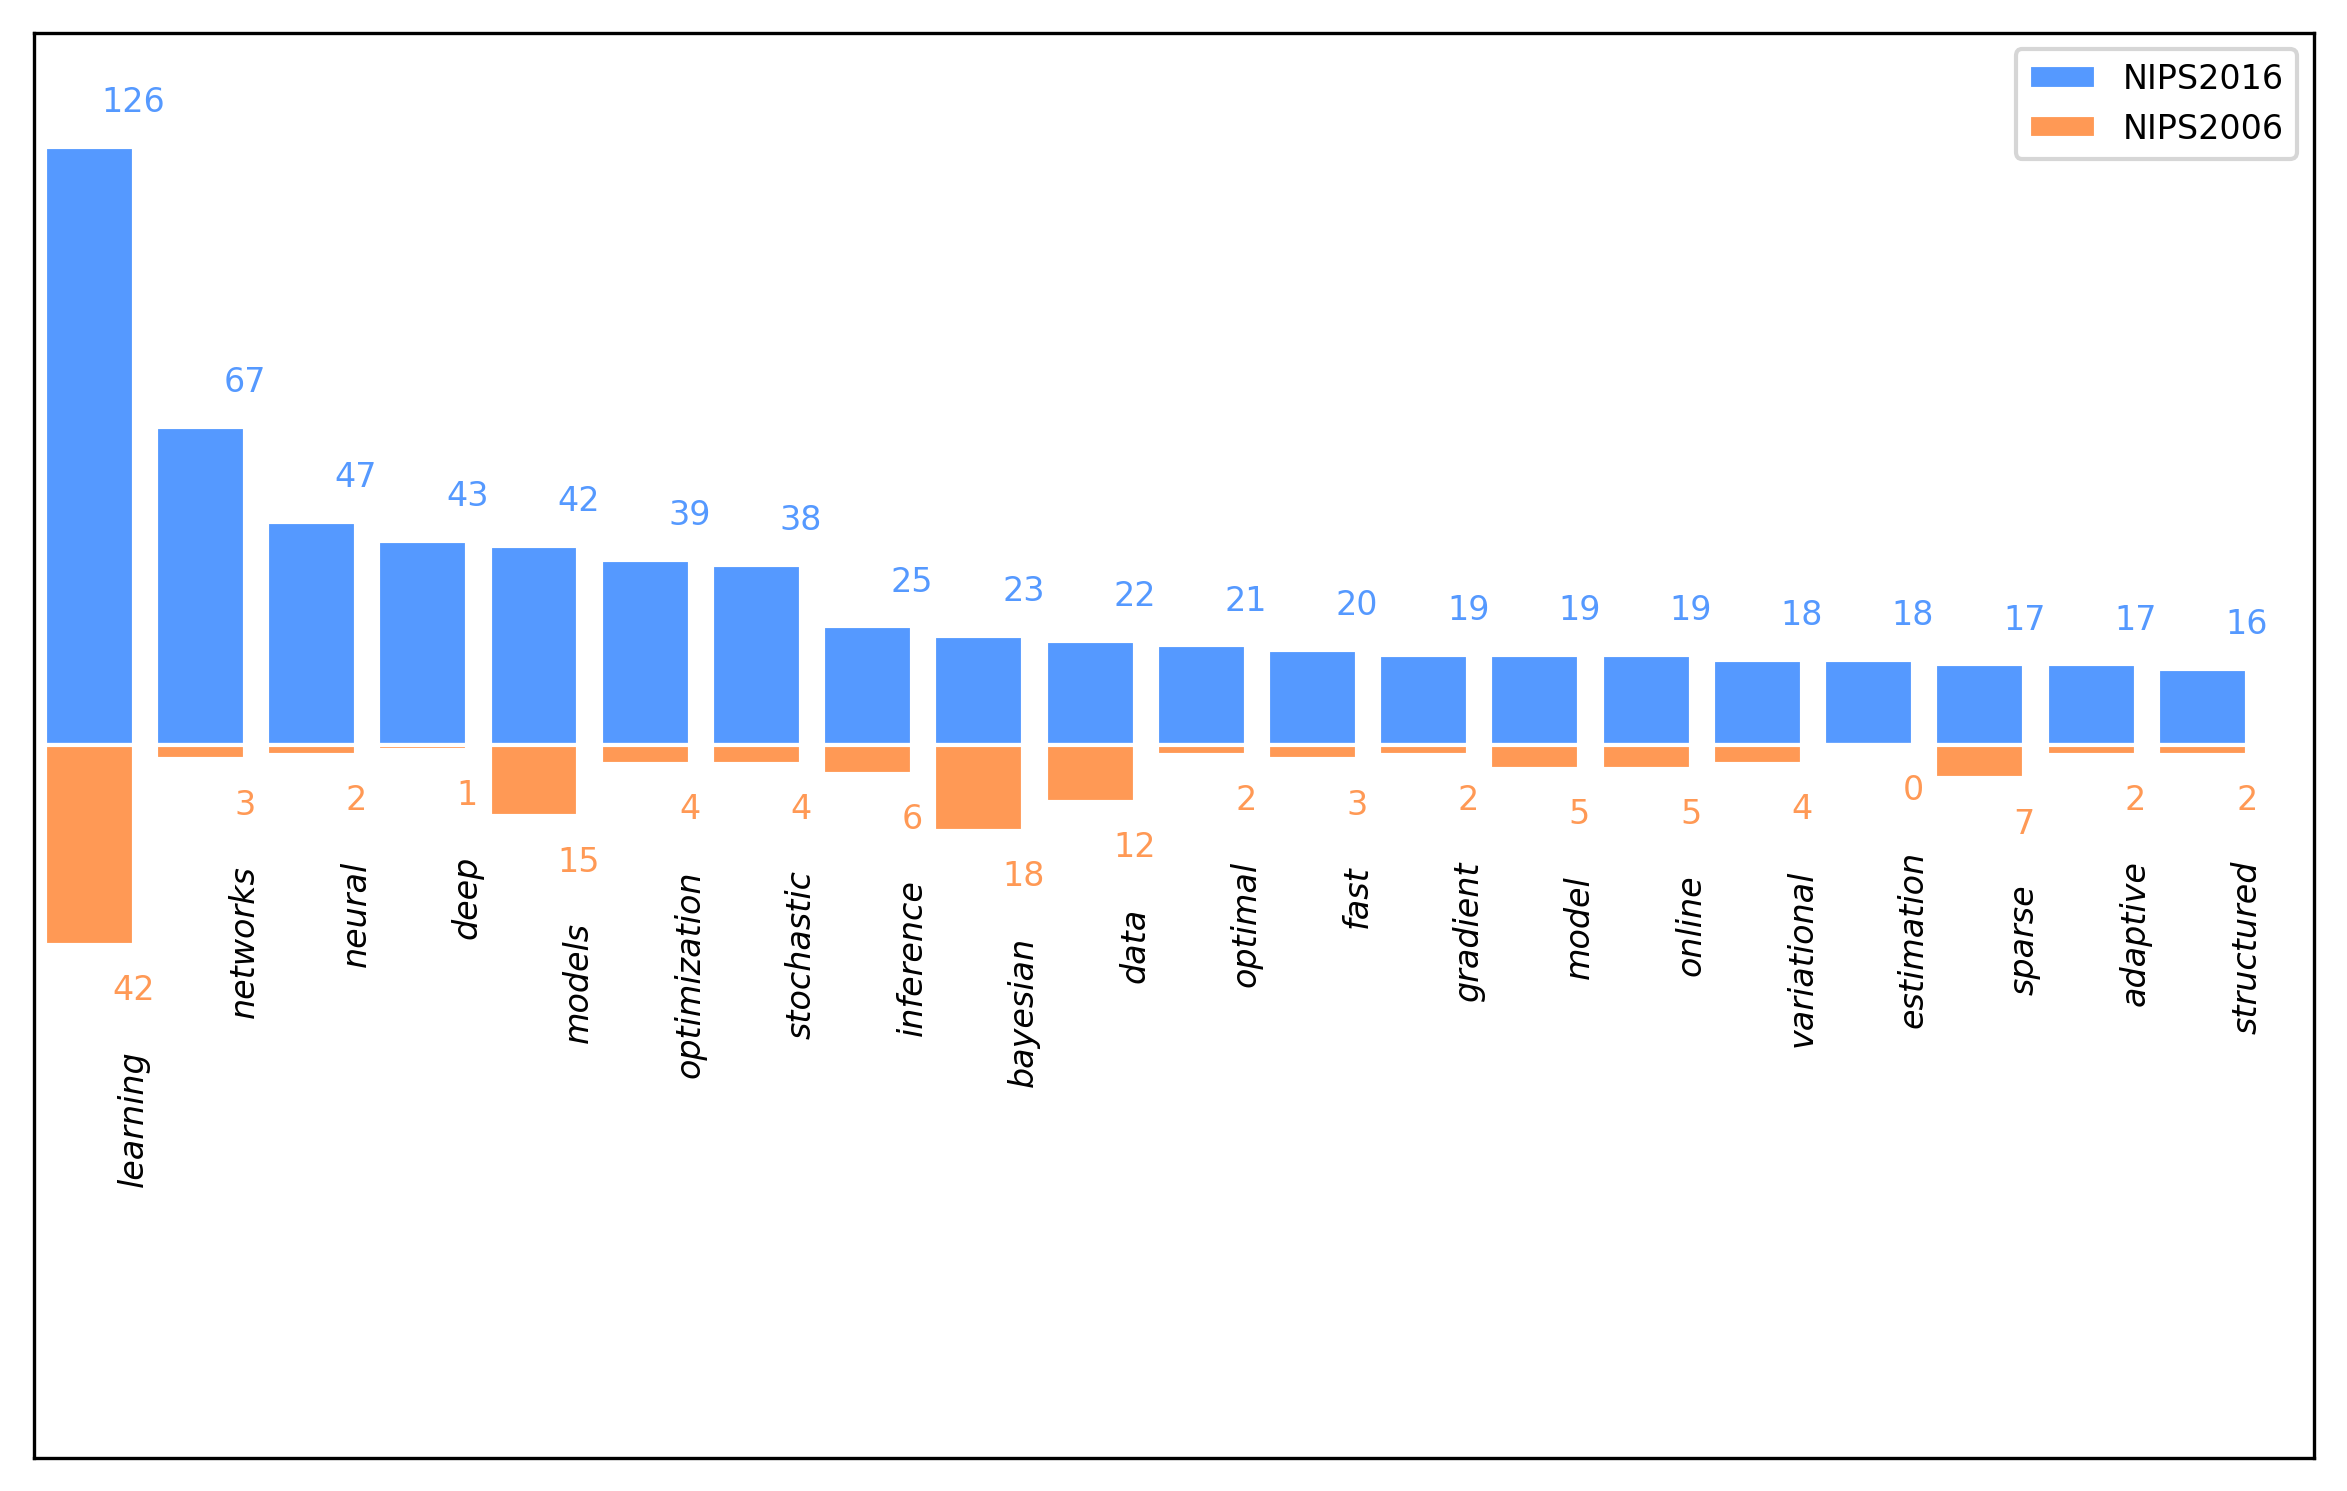

In [56]:
## 연도별 상위 키워드 비교 

fig = plt.figure(figsize=(8, 5),dpi=my_dpi)
ax = plt.subplot(111)  

df_new = pd.merge(df_y_2016, df_y_2006, on='words', how='outer')
df_new = df_new.ix[:19]
df_new=df_new.fillna(0)

n = len(df_new) #20
X = np.arange(n)
x_name = df_new['words']
x_name=x_name.tolist()

Y1 =  df_new['count_2016']
Y2 = df_new['count_2006']

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, Y1/120, facecolor='#5599FF', edgecolor='white', label='NIPS2016')
plt.bar(X, -1*Y2/120, facecolor='#ff9955', edgecolor='white', label='NIPS2006')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y/120 + 0.05, '%.0f' % y, ha='center', va= 'bottom', size=8, color='#5599FF')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y/120 - 0.05, '%.0f' % y, ha='center', va= 'top', size=8,color='#ff9955')
    
for x, y, name in zip(X, Y2, x_name):
    plt.text(x + 0.4, -y/120 - 0.23, name, ha='center', size=8,rotation = 90, color='black', style='oblique')

plt.legend ( loc="upper right", fontsize=8)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())


([], <a list of 0 Text yticklabel objects>)

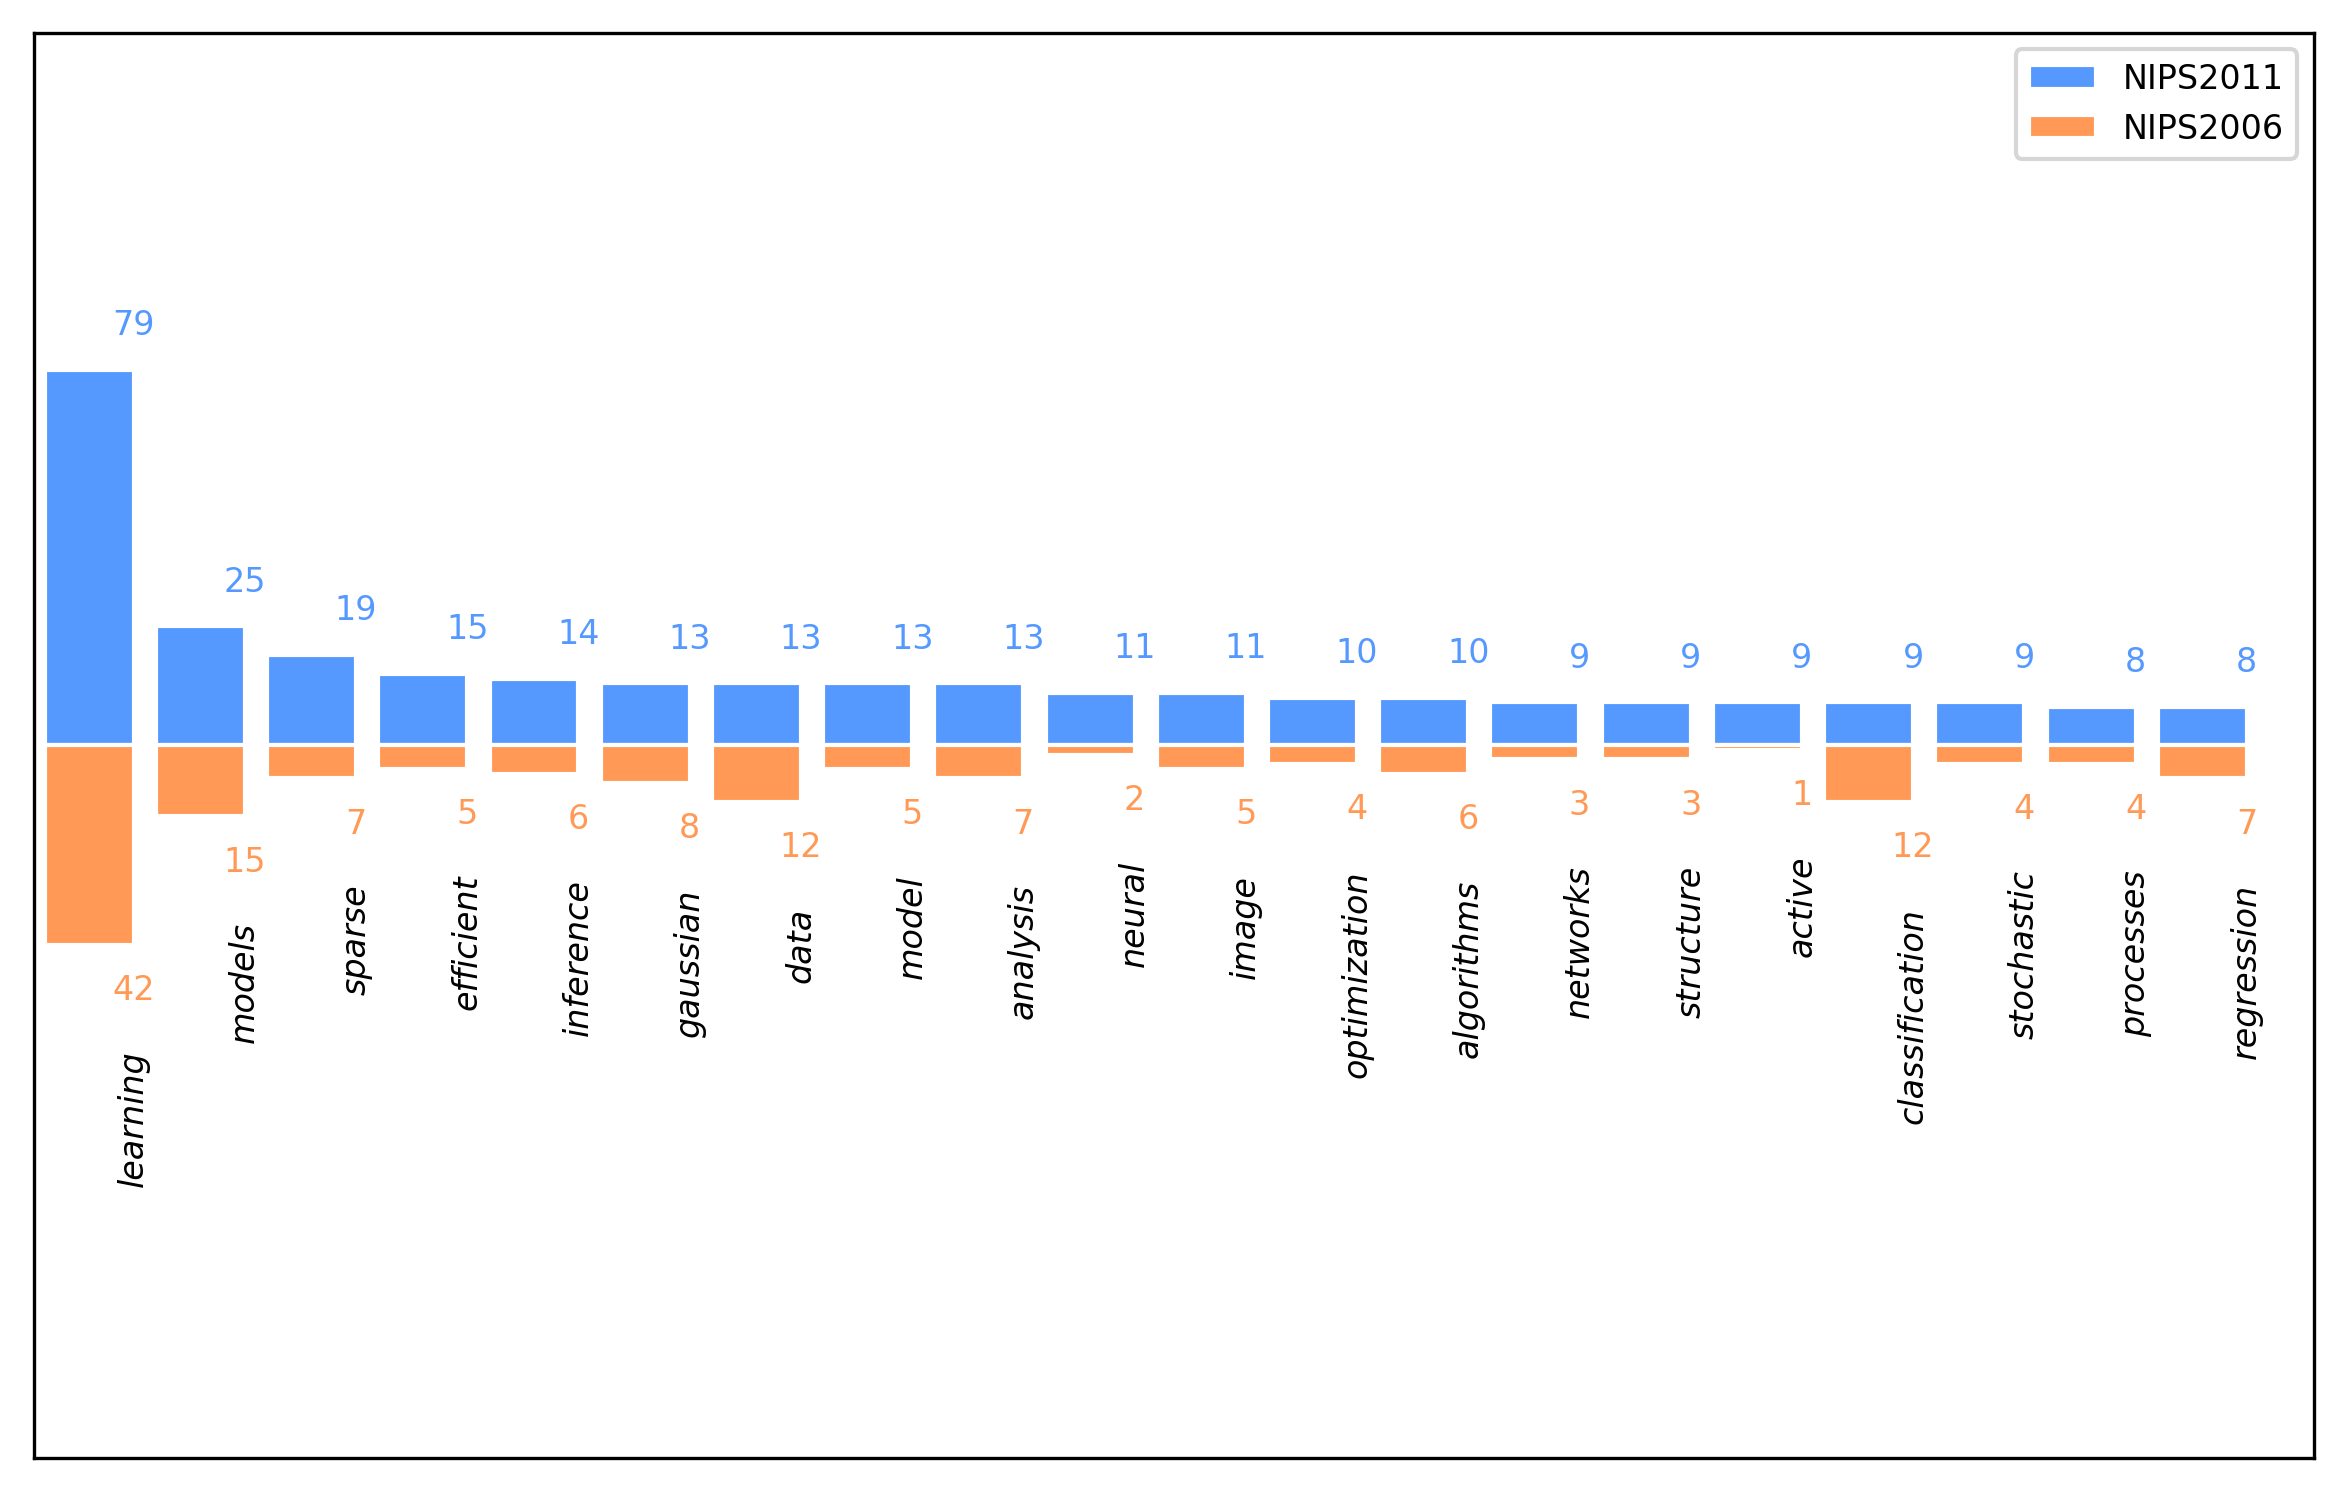

In [57]:
## 연도별 상위 키워드 비교 

fig = plt.figure(figsize=(8, 5),dpi=my_dpi)
ax = plt.subplot(111)  

df_new = pd.merge(df_y_2011, df_y_2006, on='words', how='outer')
df_new = df_new.ix[:19]
df_new=df_new.fillna(0)

n = len(df_new) #20
X = np.arange(n)
x_name = df_new['words']
x_name=x_name.tolist()

Y1 =  df_new['count_2011']
Y2 = df_new['count_2006']

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, Y1/120, facecolor='#5599FF', edgecolor='white', label='NIPS2011')
plt.bar(X, -1*Y2/120, facecolor='#ff9955', edgecolor='white', label='NIPS2006')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y/120 + 0.05, '%.0f' % y, ha='center', va= 'bottom', size=8, color='#5599FF')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y/120 - 0.05, '%.0f' % y, ha='center', va= 'top', size=8,color='#ff9955')
    
for x, y, name in zip(X, Y2, x_name):
    plt.text(x + 0.4, -y/120 - 0.23, name, ha='center', size=8,rotation = 90, color='black', style='oblique')

plt.legend ( loc="upper right", fontsize=8)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())


([], <a list of 0 Text yticklabel objects>)

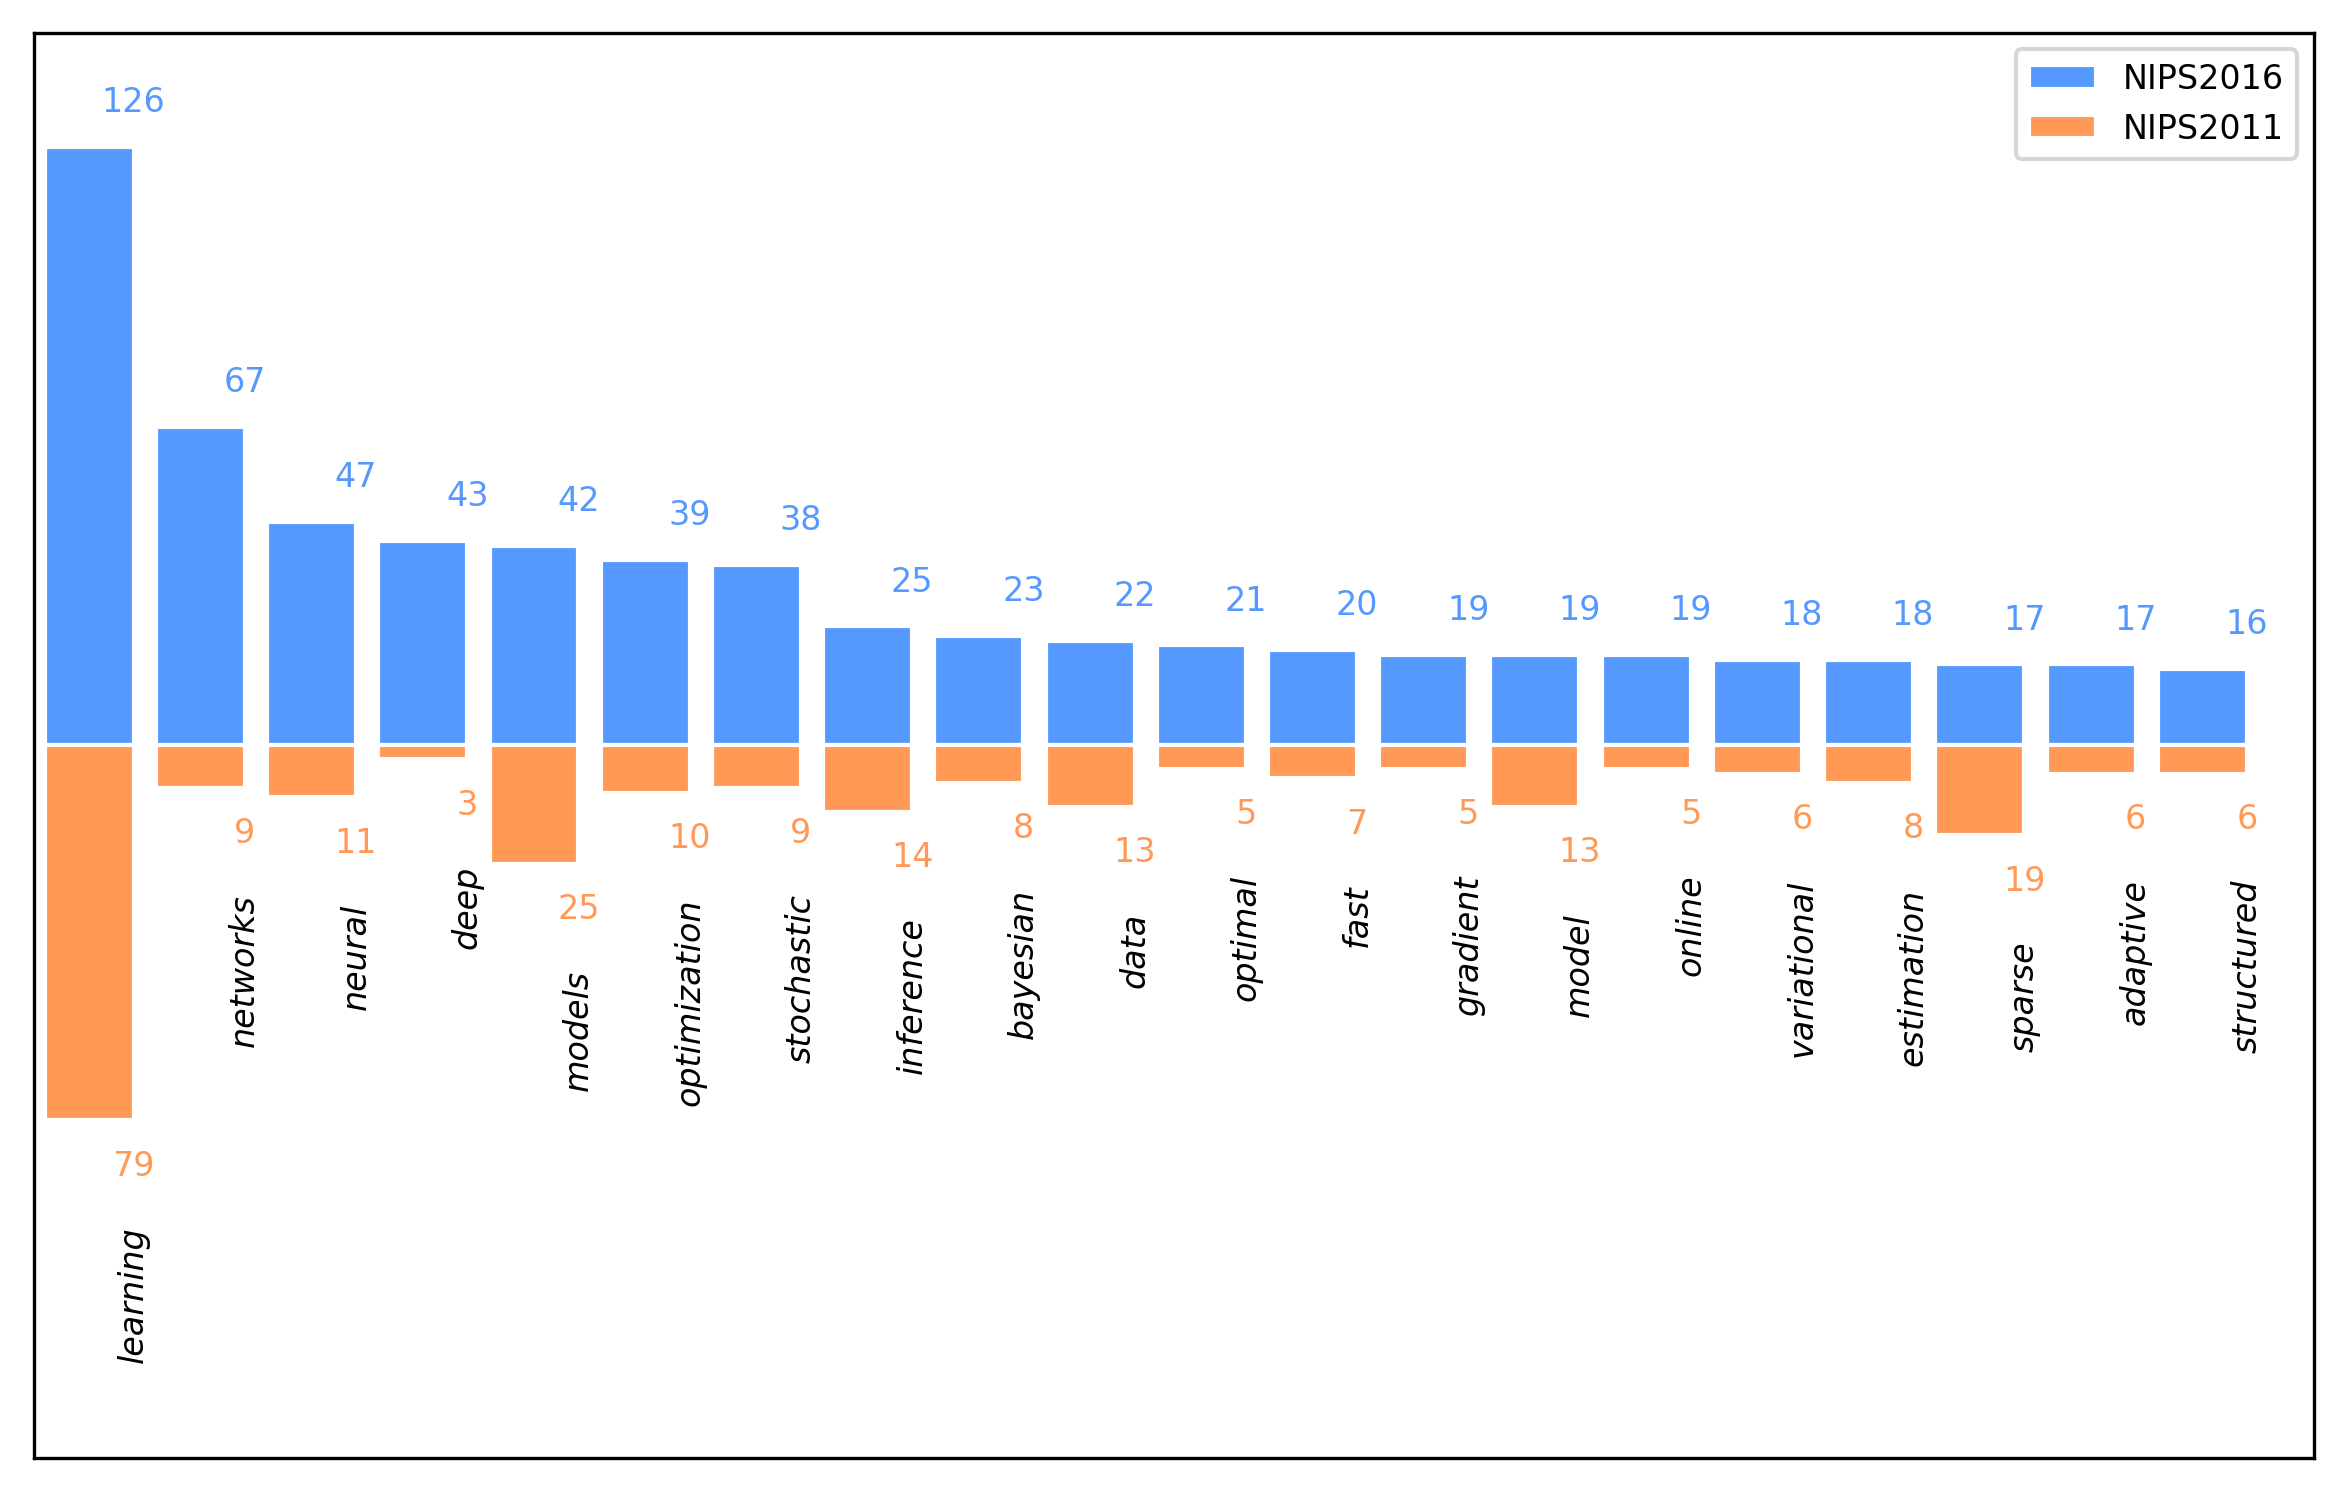

In [58]:
## 연도별 상위 키워드 비교 

fig = plt.figure(figsize=(8, 5),dpi=my_dpi)
ax = plt.subplot(111)  

df_new = pd.merge(df_y_2016, df_y_2011, on='words', how='outer')
df_new = df_new.ix[:19]
df_new=df_new.fillna(0)

n = len(df_new) #20
X = np.arange(n)
x_name = df_new['words']
x_name=x_name.tolist()

Y1 =  df_new['count_2016']
Y2 = df_new['count_2011']

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, Y1/120, facecolor='#5599FF', edgecolor='white', label='NIPS2016')
plt.bar(X, -1*Y2/120, facecolor='#ff9955', edgecolor='white', label='NIPS2011')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y/120 + 0.05, '%.0f' % y, ha='center', va= 'bottom', size=8, color='#5599FF')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y/120 - 0.05, '%.0f' % y, ha='center', va= 'top', size=8,color='#ff9955')
    
for x, y, name in zip(X, Y2, x_name):
    plt.text(x + 0.4, -y/120 - 0.23, name, ha='center', size=8,rotation = 90, color='black', style='oblique')

plt.legend ( loc="upper right", fontsize=8)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())
